(80021,)

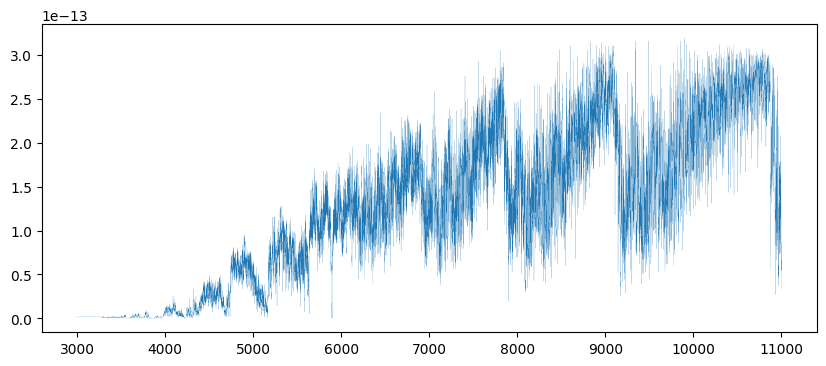

In [67]:
from astropy.table import Table, vstack
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np


hdls = fits.open('../templates/mxcom10v06_t3200_g+000_m0100.fits')
hdls[1].header



plt.figure(figsize=(10, 4))
plt.plot(hdls[1].data['LAMBDA  '], np.convolve(hdls[1].data['FLUX_DENSITY'], np.ones(20), mode='same'), lw=0.1)
hdls[1].data['FLUX_DENSITY'].shape

In [27]:
from astropy.table import Table, vstack
import preprocess

eFEDS_cat1 = Table.read('./Data/eFEDS_clusters_V3.2.fits', 1)
eFEDS_cat2 = Table.read('./Data/J_A+A_661_A7/J_A+A_661_A7_table2.dat.fits', 1)
mr_sim = preprocess.read_15mr_simulation()

simulation name: mr_0.153_0.0408_0.614_0.666, label: C1
simulation name: mr_0.189_0.0455_0.697_0.703, label: C2
simulation name: mr_0.200_0.0415_0.850_0.730, label: C3
simulation name: mr_0.204_0.0437_0.739_0.689, label: C4
simulation name: mr_0.222_0.0421_0.793_0.676, label: C5
simulation name: mr_0.232_0.0413_0.687_0.670, label: C6
simulation name: mr_0.268_0.0449_0.721_0.699, label: C7
simulation name: mr_0.272_0.0456_0.809_0.704, label: C8
simulation name: mr_0.301_0.0460_0.824_0.707, label: C9
simulation name: mr_0.304_0.0504_0.886_0.740, label: C10
simulation name: mr_0.342_0.0462_0.834_0.708, label: C11
simulation name: mr_0.363_0.0490_0.884_0.729, label: C12
simulation name: mr_0.400_0.0485_0.650_0.675, label: C13
simulation name: mr_0.406_0.0466_0.867_0.712, label: C14
simulation name: mr_0.428_0.0492_0.830_0.732, label: C15


In [28]:
eFEDS_cat1.keys()

['ID',
 'ID_SRC',
 'RA',
 'DEC',
 'EXT_LIKE',
 'DET_LIKE',
 'z',
 'z_type',
 'T_300kpc',
 'T_300kpc_L',
 'T_300kpc_U',
 'L_300kpc',
 'L_300kpc_L',
 'L_300kpc_U',
 'Lbol_300kpc',
 'Lbol_300kpc_L',
 'Lbol_300kpc_U',
 'F_300kpc',
 'F_300kpc_L',
 'F_300kpc_U',
 'T_500kpc',
 'T_500kpc_L',
 'T_500kpc_U',
 'L_500kpc',
 'L_500kpc_L',
 'L_500kpc_U',
 'Lbol_500kpc',
 'Lbol_500kpc_L',
 'Lbol_500kpc_U',
 'F_500kpc',
 'F_500kpc_L',
 'F_500kpc_U',
 'SNR_MAX',
 'R_SNR_MAX']

In [29]:
from astropy.cosmology import Planck18 as cosmo  # 可替换为你选择的宇宙学模型
import astropy.units as u
import numpy as np

z = mr_sim['z']             # 红移
R_kpc = mr_sim['R500_kpc'].data*u.kpc     # 半径，单位为 kpc
DA = cosmo.angular_diameter_distance(z)  # 单位为 Mpc
R_Mpc = R_kpc.to(u.Mpc)
theta_rad = (R_Mpc / DA) * u.rad
theta_rad  = theta_rad[theta_rad < 10*u.rad]
# 转为 arcmin
theta_arcmin = theta_rad.to(u.arcmin)
theta_arcmin

c:\Users\q9775\miniconda3\Lib\site-packages\astropy\units\quantity.py:659: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<Quantity [4.65478012, 3.03188462, 3.92151434, ..., 1.98386454, 1.54603784,
           1.967359  ] arcmin>

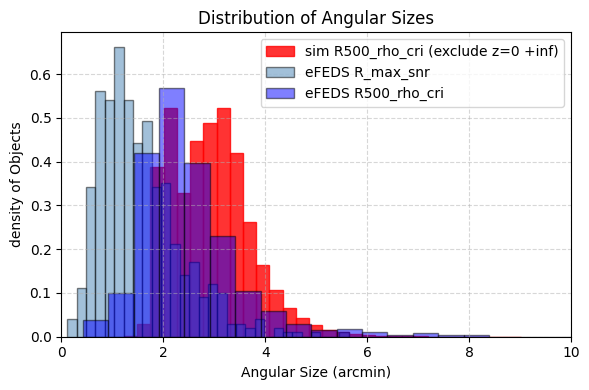

In [48]:
import matplotlib.pyplot as plt

# 转换为数值（去掉单位），以 arcmin 为单位
theta_values = theta_arcmin.value

# 绘制柱状图
plt.figure(figsize=(6, 4))
plt.hist(theta_values, bins=30, color='red', edgecolor='red', density=True, label='sim R500_rho_cri (exclude z=0 +inf)', alpha=0.8)
plt.hist(eFEDS_cat1['R_SNR_MAX'].data, bins=30, color='steelblue', density=True, edgecolor='black', label='eFEDS R_max_snr', alpha=0.5)
plt.hist(eFEDS_cat2['R500'].data, bins=30, color='blue', density=True, edgecolor='black', label='eFEDS R500_rho_cri', alpha=0.5)
plt.xlabel('Angular Size (arcmin)')
plt.ylabel('density of Objects')
plt.xlim(0, 10)
plt.title('Distribution of Angular Sizes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend()

In [1]:
import preprocess
observed_data = preprocess.observed_data()
simulated_data=preprocess.simulated_data()

d:\桌面\eROSTA\preprocess.py:116: RuntimeWarning: invalid value encountered in log10
  table2['R'] = np.log10(erass1['R500'].data)
d:\桌面\eROSTA\preprocess.py:118: RuntimeWarning: invalid value encountered in log10
  table2['R_e'] = np.log10(erass1['R500'].data)-np.log10(erass1['R500_L'].data)
d:\桌面\eROSTA\preprocess.py:119: RuntimeWarning: invalid value encountered in log10
  table2['R_E'] = np.log10(erass1['R500_H'].data)-np.log10(erass1['R500'].data)
d:\桌面\eROSTA\preprocess.py:120: RuntimeWarning: invalid value encountered in log10
  table2['Mgas'] = np.log10(erass1['MGAS500'].data*1e11)
d:\桌面\eROSTA\preprocess.py:122: RuntimeWarning: invalid value encountered in log10
  table2['Mgas_e'] = np.log10(erass1['MGAS500'].data)-np.log10(erass1['MGAS500_L'].data)
d:\桌面\eROSTA\preprocess.py:123: RuntimeWarning: invalid value encountered in log10
  table2['Mgas_E'] = np.log10(erass1['MGAS500_H'].data)-np.log10(erass1['MGAS500'].data)
d:\桌面\eROSTA\preprocess.py:124: RuntimeWarning: invalid value

['ID', 'ID-SRC', 'RAdeg', 'DEdeg', 'ExtLike', 'DetLike', 'z', 'R500', 'T500', 'e_T500', 'E_T500', 'l_Lx500', 'Lx500', 'e_Lx500', 'E_Lx500', 'l_Lbol500', 'Lbol500', 'e_Lbol500', 'E_Lbol500', 'l_Mgas500', 'Mgas500', 'e_Mgas500', 'E_Mgas500', 'l_Yx500', 'Yx500', 'e_Yx500', 'E_Yx500', 'Tcex500', 'e_Tcex500', 'E_Tcex500', 'l_Lxcex500', 'Lxcex500', 'e_Lxcex500', 'E_Lxcex500', 'l_Lbolcex500', 'Lbolcex500', 'e_Lbolcex500', 'E_Lbolcex500', 'Texp']


d:\桌面\eROSTA\preprocess.py:138: RuntimeWarning: divide by zero encountered in log10
  table2['VDIS'] = np.log10(erass1_optical_properties['vdispBoot'].data)
d:\桌面\eROSTA\preprocess.py:141: RuntimeWarning: invalid value encountered in divide
  table2['VDIS_e'] = table2['VDIS_E'] = np.log10(1+erass1_optical_properties['e_vdispBoot'].data/erass1_optical_properties['vdispBoot'].data)


simulation name: mr_0.153_0.0408_0.614_0.666, label: C1
simulation name: mr_0.189_0.0455_0.697_0.703, label: C2
simulation name: mr_0.200_0.0415_0.850_0.730, label: C3
simulation name: mr_0.204_0.0437_0.739_0.689, label: C4
simulation name: mr_0.222_0.0421_0.793_0.676, label: C5
simulation name: mr_0.232_0.0413_0.687_0.670, label: C6
simulation name: mr_0.268_0.0449_0.721_0.699, label: C7
simulation name: mr_0.272_0.0456_0.809_0.704, label: C8
simulation name: mr_0.301_0.0460_0.824_0.707, label: C9
simulation name: mr_0.304_0.0504_0.886_0.740, label: C10
simulation name: mr_0.342_0.0462_0.834_0.708, label: C11
simulation name: mr_0.363_0.0490_0.884_0.729, label: C12
simulation name: mr_0.400_0.0485_0.650_0.675, label: C13
simulation name: mr_0.406_0.0466_0.867_0.712, label: C14
simulation name: mr_0.428_0.0492_0.830_0.732, label: C15


d:\桌面\eROSTA\preprocess.py:167: RuntimeWarning: divide by zero encountered in log10
  table1['R_e'] = fac2*(np.log10(mr_simulation['R500_kpc'].data) - np.log10(mr_simulation['R2500_kpc'].data))
d:\桌面\eROSTA\preprocess.py:181: RuntimeWarning: divide by zero encountered in log10
  table1['Msta'] = np.log10(mr_simulation['Msta500'].data)+12
d:\桌面\eROSTA\preprocess.py:182: RuntimeWarning: divide by zero encountered in log10
  table1['Msta_E'] = fac1*(np.log10(mr_simulation['Msta200'].data) - np.log10(mr_simulation['Msta500'].data))
d:\桌面\eROSTA\preprocess.py:182: RuntimeWarning: invalid value encountered in subtract
  table1['Msta_E'] = fac1*(np.log10(mr_simulation['Msta200'].data) - np.log10(mr_simulation['Msta500'].data))
d:\桌面\eROSTA\preprocess.py:183: RuntimeWarning: divide by zero encountered in log10
  table1['Msta_e'] = fac2*(np.log10(mr_simulation['Msta500'].data) - np.log10(mr_simulation['Msta2500'].data))
d:\桌面\eROSTA\preprocess.py:183: RuntimeWarning: invalid value encountered i

In [2]:
simulated_data = simulated_data[simulated_data['label'] != 'HR']
simulated_data['VDIS'].data.mean()

np.float64(nan)

In [3]:
# check the optical catalog
from astropy.table import Table

Optical_properties = Table.read('./Data/J_A+A_688_A210/J_A+A_688_A210_tablee1.dat.gz.fits')
erass1 = Table.read('./Data/erass1cl_primary_v3.2.fits',1)
len(Optical_properties), len(erass1)

(12247, 12247)

In [5]:
Optical_properties.keys()

['Name',
 'DetUId',
 'RAdeg',
 'DEdeg',
 'ePos',
 'RAOdeg',
 'DEOdeg',
 'RABdeg',
 'DEBdeg',
 'zmagBCG',
 'Bestz',
 'e_Bestz',
 'Bestztype',
 'zlambda',
 'e_zlambda',
 'zlambdacorr',
 'E_zlambdacorr',
 'e_zlambdacorr',
 'zlambda2',
 'Litz',
 'e_Litz',
 'r_Litz',
 'SpeczBoot',
 'e_SpeczBoot',
 'Nmemb',
 'CGSpecz',
 'e_CGSpecz',
 'BCGSpecz',
 'vdispBoot',
 'e_vdispBoot',
 'f_vdispBoot',
 'vdispType',
 'LambdaN',
 'e_LambdaN',
 'LambdaOptN',
 'e_LambdaOptN',
 'ScaleVal',
 'MaskFrac',
 'Run',
 'Lmax',
 'NHI',
 'ExtLike',
 'Pcont',
 'SharedMemb',
 'InfootPrint',
 'limgmag',
 'limrmag',
 'limimag',
 'limzmag',
 'limW1mag',
 'inzvlim',
 'zvlim02',
 'zvlim04',
 'Gaia',
 'NGC30',
 'HECATE']

In [2]:
from plot import plot_distribution
import matplotlib.pyplot as plt
import seaborn as sns
# cleaning data, only select the data in the ranges
eFEDS = observed_data[observed_data['label']=='eFEDS']
eRASS1 = observed_data[observed_data['label']=='eRASS1']
simulated_data = simulated_data[simulated_data['label'] != 'HR']
cols = {'R':[], 'Mgas':[], 'L':[], 'T':[], 'z':[]}
cols = preprocess.filter_paras(cols, simulated_data)
cols = {'R':[2.5, 3.5], 'Mgas':[12, 14], 'L':[43, 46], 'T':[0, 1], 'z':[0, 1]}
print(cols)
eFEDS = preprocess.filtering(eFEDS, cols, add_error=True)
eRASS1 =  preprocess.filtering(eRASS1, cols, add_error=True)
simulated_data = preprocess.filtering(simulated_data, cols, add_error=True)
data = [eFEDS, eRASS1, simulated_data]
labels = ['eFEDS', 'eRASS1', 'Simualtions']
plot_distribution(data, labels, cols)

d:\桌面\eROSTA\plot.py:3: FutureWarning: Passing 'z' as keyword is deprecated since version 7.0 and will stop working in a future release. Pass it positionally to suppress this warning.
  import model_new_selection_fun as model_new


{'R': [2.5, 3.5], 'Mgas': [12, 14], 'L': [43, 46], 'T': [0, 1], 'z': [0, 1]}
Total: 542
R in range: 527
Mgas in range: 504
L in range: 479
T in range: 418
z in range: 413
z_e add external error 0.05
z_E add external error 0.05
R add error+ 0.025083650806397628, error- 0.027698290807208092
Mgas add error+ 0.07525095241919245, error- 0.08309487242162386
L add error+ 0.13936845203094142, error- 0.10605339244792618
T add error+ 0.2843382619008286, error- 0.16899091863774218
z add error+ 0.05, error- 0.05
Total: 12247
R in range: 10371
Mgas in range: 9588
L in range: 9338
T in range: 2675
z in range: 2648
z_e add external error 0.05
z_E add external error 0.05
R add error+ 0.02342166364417242, error- 0.024331264679731346
Mgas add error+ 0.07156076244124654, error- 0.10218418396241469
L add error+ 0.14794716081077997, error- 0.10967821711388193
T add error+ 0.3255605850627317, error- 0.155850201589316
z add error+ 0.05, error- 0.05
Total: 424257
R in range: 422604
Mgas in range: 422464
L in 

c:\Users\q9775\miniconda3\Lib\site-packages\numpy\_core\fromnumeric.py:867: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


R add error+ 0.06163205488047622, error- 0.018190206070166037
Mgas add error+ 0.059837396869821105, error- 0.024717694119846353
L add error+ 0.006533645581503636, error- 0.006844633349669449
T add error+ 0.016935297454475563, error- 0.0034084727933566625
z add error+ 0.05, error- 0.05


d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has b

d:\桌面\eROSTA\boosting.py:189: RuntimeWarning: divide by zero encountered in divide
  ax.scatter(err_ave[:, i], (err_ave[:, i]-std[:, i])/err_ave[:, i], s=2, alpha=0.5, label= f'{vars_name[i]}: err_ave')
d:\桌面\eROSTA\boosting.py:189: RuntimeWarning: invalid value encountered in divide
  ax.scatter(err_ave[:, i], (err_ave[:, i]-std[:, i])/err_ave[:, i], s=2, alpha=0.5, label= f'{vars_name[i]}: err_ave')
d:\桌面\eROSTA\boosting.py:190: RuntimeWarning: invalid value encountered in divide
  ax.scatter(err_min[:, i], (err_min[:, i]-(q50[:, i]-q16[:, i]))/err_min[:, i], s=2, alpha=0.5, label= f'{vars_name[i]}: err_minus')
d:\桌面\eROSTA\boosting.py:191: RuntimeWarning: invalid value encountered in divide
  ax.scatter(err_plus[:, i], (err_plus[:, i]-(q84[:, i]-q50[:, i]))/err_plus[:, i], s=2, alpha=0.5, label= f'{vars_name[i]}: err_plus')
d:\桌面\eROSTA\boosting.py:188: RuntimeWarning: divide by zero encountered in divide
  ax.scatter(mu[:, i], (mu[:, i]-ave[:, i])/mu[:, i], s=2, alpha=0.5, label= f

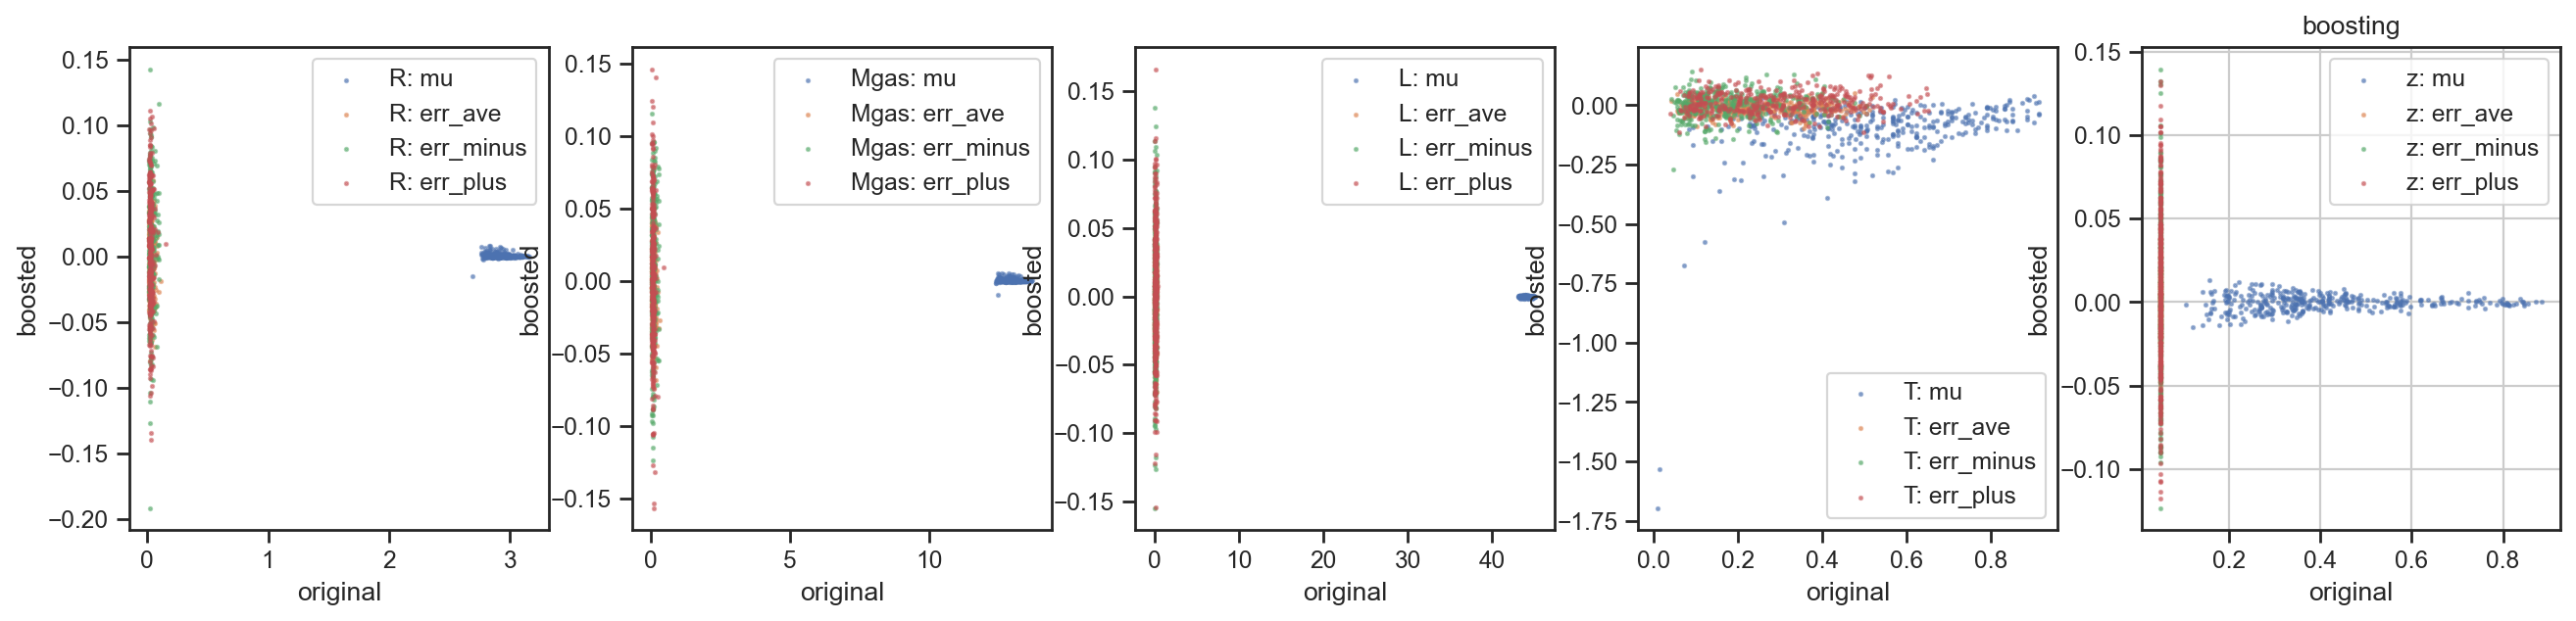

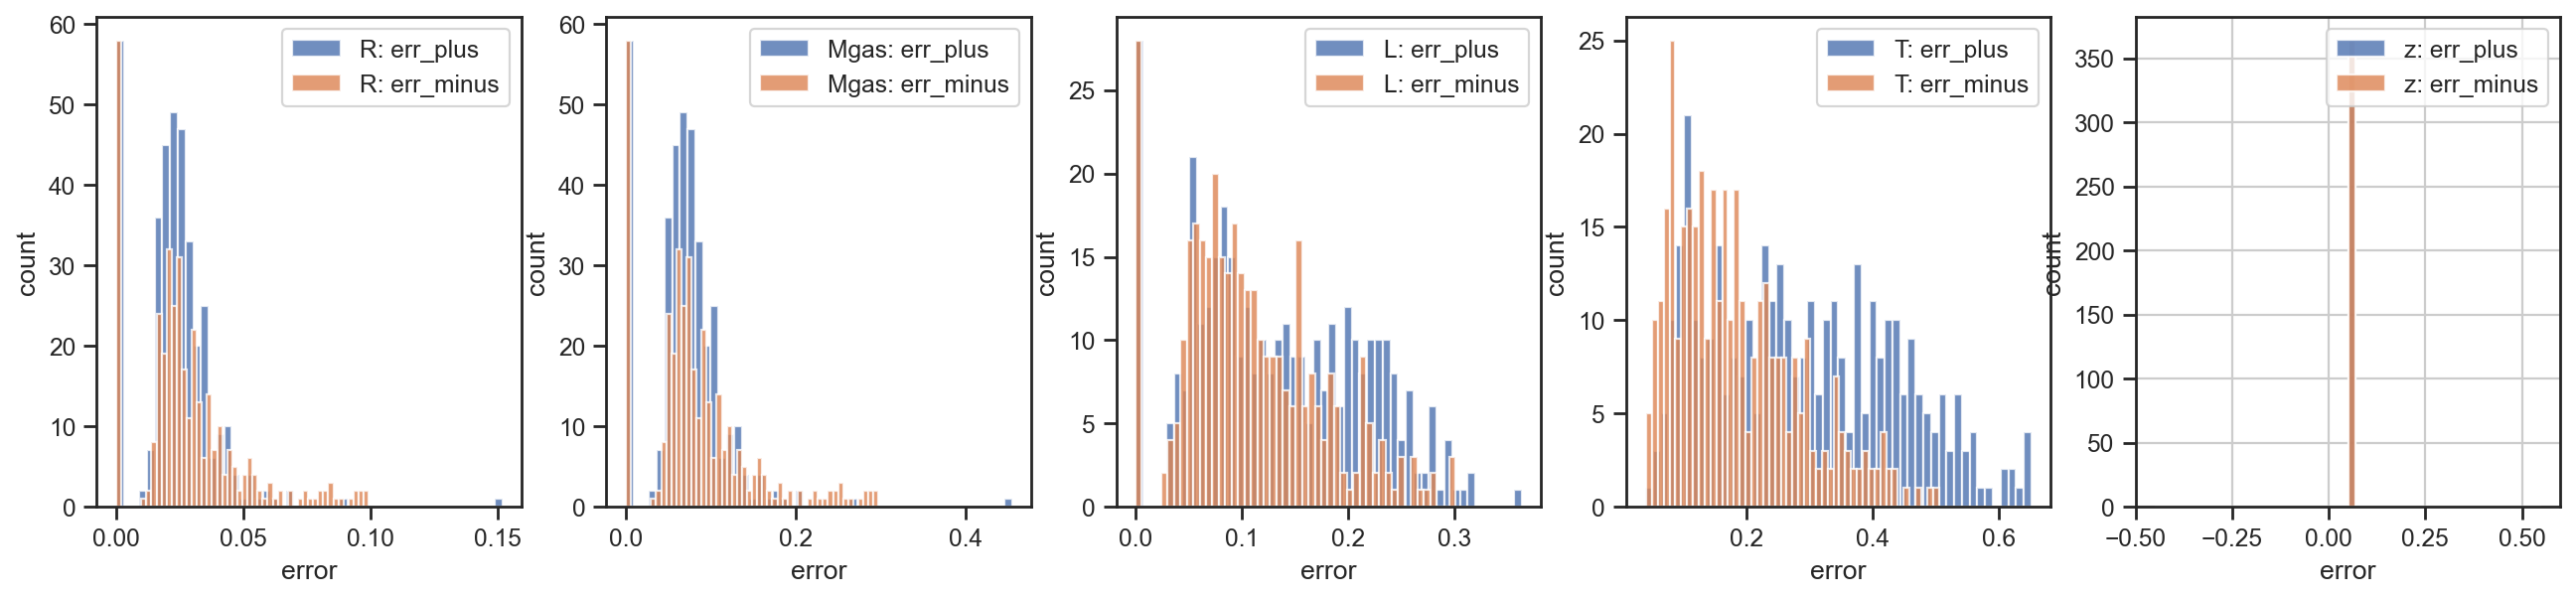

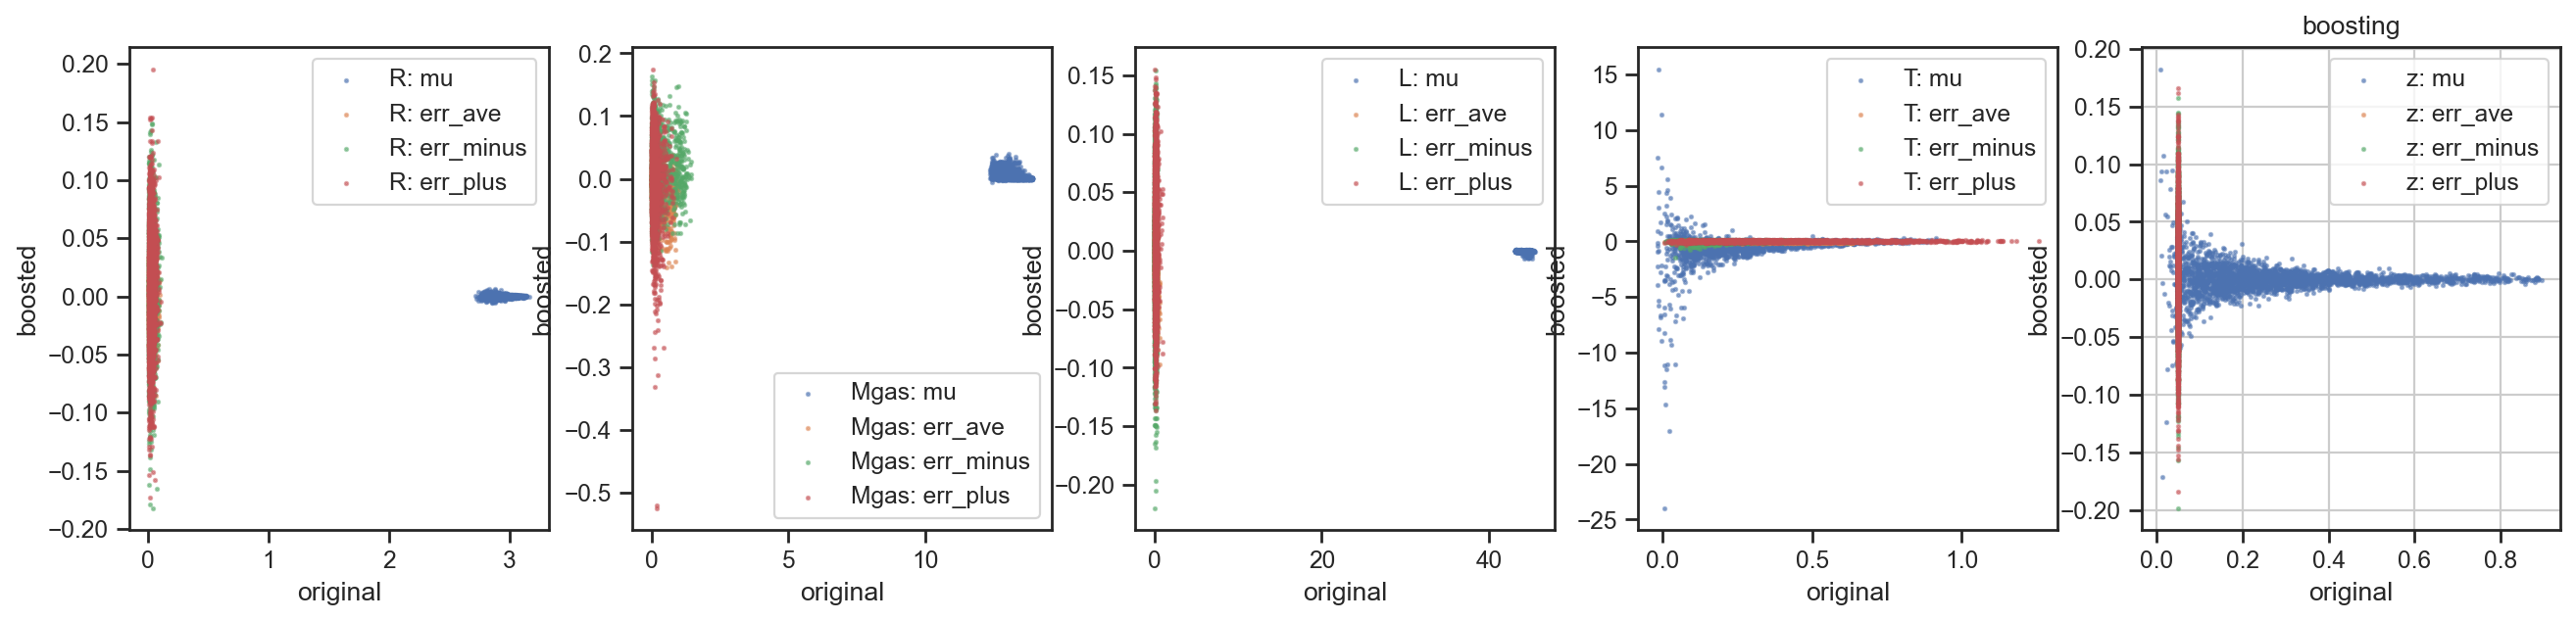

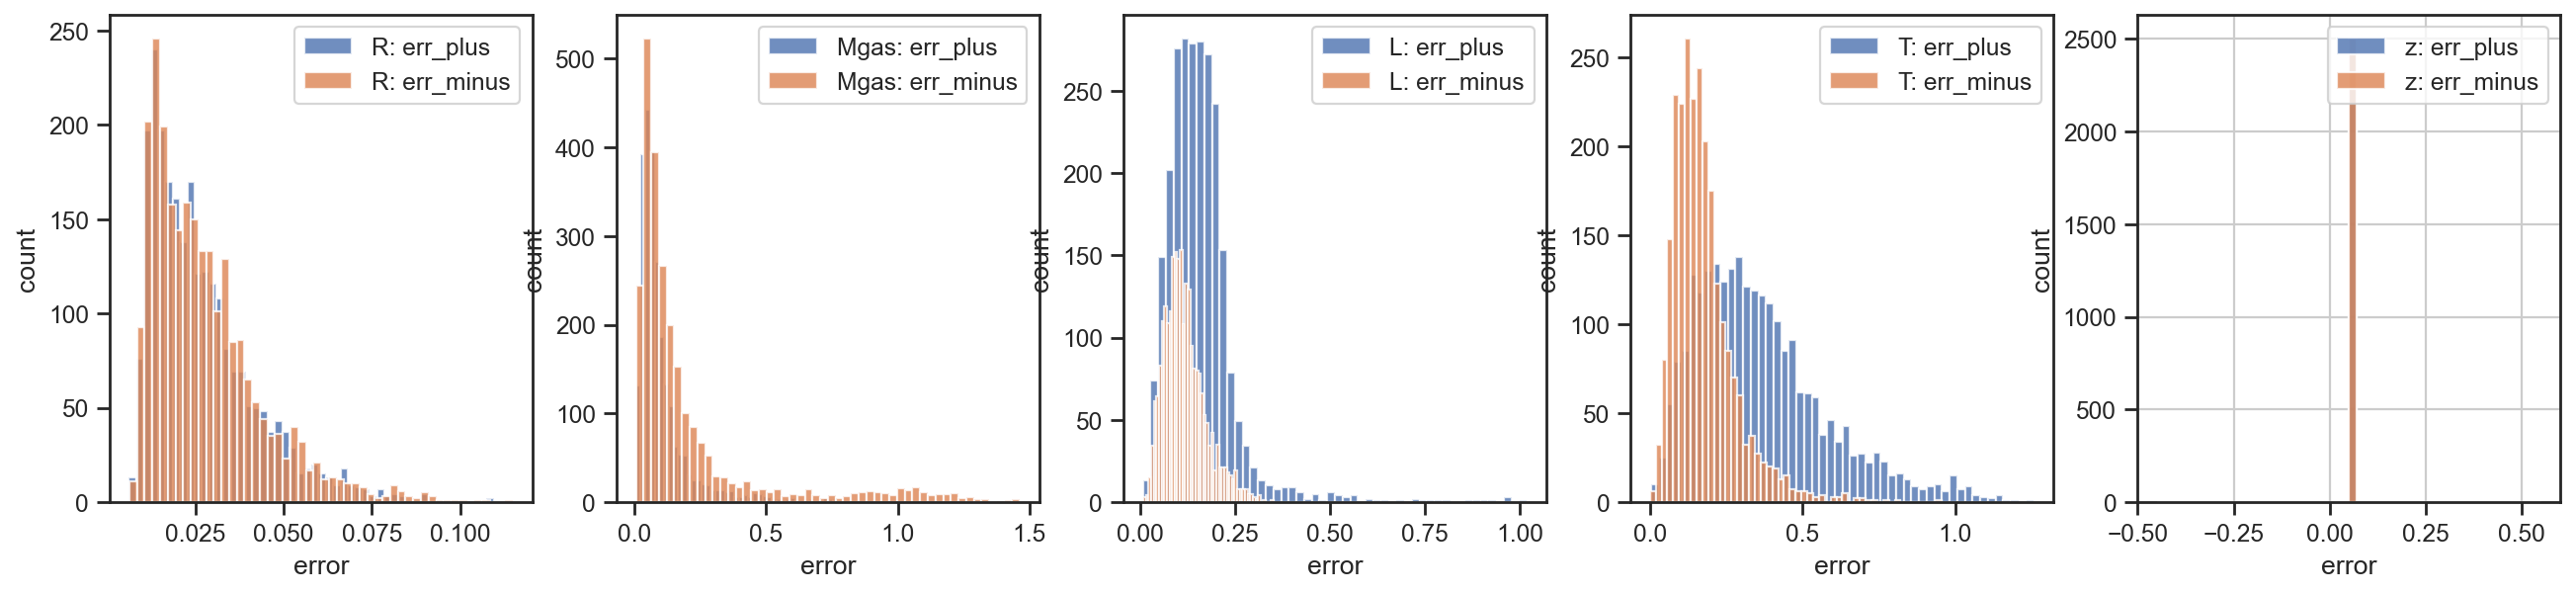

In [7]:
import boosting
# === the coloum name and error
vars_name = ['R', 'Mgas', 'L', 'T', 'z'] # estimate value
boosted_eFEDS, boost_eFEDS = boosting.boosting(eFEDS, vars_name, num=1000, sampler='splitnorm')
boosted_eROSTA_DR1, boost_DR1 = boosting.boosting(eRASS1, vars_name, num=1000, sampler='splitnorm')
boosting.show_boosting_results(boosted_eFEDS, vars_name)
boosting.show_error_dist(boosted_eFEDS, vars_name)
boosting.show_boosting_results(boosted_eROSTA_DR1, vars_name)
boosting.show_error_dist(boosted_eROSTA_DR1, vars_name)

In [8]:
import preprocess
simulated_data=preprocess.simulated_data()
simulated_data = simulated_data[simulated_data['label'] != 'HR']
observed_data = preprocess.observed_data()
cols = {'R':[], 'Mgas':[], 'L':[], 'T':[], 'z':[]}
cols = preprocess.filter_paras(cols, simulated_data)
print(cols)
eFEDS = observed_data[observed_data['label']=='eFEDS']
eRASS1 = observed_data[observed_data['label']=='eRASS1']
eFEDS = preprocess.filtering(eFEDS, cols, add_error=True)
eRASS1 =  preprocess.filtering(eRASS1, cols, add_error=True)

simulation name: mr_0.153_0.0408_0.614_0.666, label: C1
simulation name: mr_0.189_0.0455_0.697_0.703, label: C2
simulation name: mr_0.200_0.0415_0.850_0.730, label: C3
simulation name: mr_0.204_0.0437_0.739_0.689, label: C4
simulation name: mr_0.222_0.0421_0.793_0.676, label: C5
simulation name: mr_0.232_0.0413_0.687_0.670, label: C6
simulation name: mr_0.268_0.0449_0.721_0.699, label: C7
simulation name: mr_0.272_0.0456_0.809_0.704, label: C8
simulation name: mr_0.301_0.0460_0.824_0.707, label: C9
simulation name: mr_0.304_0.0504_0.886_0.740, label: C10
simulation name: mr_0.342_0.0462_0.834_0.708, label: C11
simulation name: mr_0.363_0.0490_0.884_0.729, label: C12
simulation name: mr_0.400_0.0485_0.650_0.675, label: C13
simulation name: mr_0.406_0.0466_0.867_0.712, label: C14
simulation name: mr_0.428_0.0492_0.830_0.732, label: C15


d:\桌面\eROSTA\preprocess.py:147: RuntimeWarning: divide by zero encountered in log10
  table1['R_e'] = fac2*(np.log10(mr_simulation['R500_kpc'].data) - np.log10(mr_simulation['R2500_kpc'].data))
d:\桌面\eROSTA\preprocess.py:161: RuntimeWarning: divide by zero encountered in log10
  table1['Msta'] = np.log10(mr_simulation['Msta500'].data)+12
d:\桌面\eROSTA\preprocess.py:162: RuntimeWarning: divide by zero encountered in log10
  table1['Msta_E'] = fac1*(np.log10(mr_simulation['Msta200'].data) - np.log10(mr_simulation['Msta500'].data))
d:\桌面\eROSTA\preprocess.py:162: RuntimeWarning: invalid value encountered in subtract
  table1['Msta_E'] = fac1*(np.log10(mr_simulation['Msta200'].data) - np.log10(mr_simulation['Msta500'].data))
d:\桌面\eROSTA\preprocess.py:163: RuntimeWarning: divide by zero encountered in log10
  table1['Msta_e'] = fac2*(np.log10(mr_simulation['Msta500'].data) - np.log10(mr_simulation['Msta2500'].data))
d:\桌面\eROSTA\preprocess.py:163: RuntimeWarning: invalid value encountered i

{'R': [np.float64(2.423500940767085), np.float64(3.1651606352478505)], 'Mgas': [np.float64(12.355568972436958), np.float64(13.907785738357385)], 'L': [np.float64(43.119094297390056), np.float64(45.77272422056844)], 'T': [np.float64(-0.017790703642821634), np.float64(0.9181558337852277)], 'z': [np.float64(0.0), np.float64(0.9)]}
Total: 542
R in range: 525
Mgas in range: 457
L in range: 448
T in range: 374
z in range: 364
z_e add external error 0.05
z_E add external error 0.05
R add error+ 0.024877872765634468, error- 0.02733404789422611
Mgas add error+ 0.07463361829690418, error- 0.08200214368267836
L add error+ 0.13675569468885274, error- 0.10389613386872246
T add error+ 0.278799788865323, error- 0.16545864339753624
z add error+ 0.05, error- 0.05
Total: 12247
R in range: 10424
Mgas in range: 8809
L in range: 8661
T in range: 2553
z in range: 2504
z_e add external error 0.05
z_E add external error 0.05
R add error+ 0.02328920279000468, error- 0.02415529427497831
Mgas add error+ 0.071053

In [3]:
import numpy as np
from plot import plot_distribution
import boosting

cols = {'R':[2.5, 3.5], 'Mgas':[12, 14], 'L':[43, 46], 'T':[-0.2, 1], 'z':[0, 1]}
vars_name = ['R', 'Mgas', 'L', 'T', 'z'] # estimate value
simulated_data=preprocess.simulated_data()
simulated_data = simulated_data[simulated_data['label'] != 'HR']
#cols = preprocess.filter_paras(cols, simulated_data)
observed_data = preprocess.observed_data()
observed_data = preprocess.filtering(observed_data, cols)
simulated_data= preprocess.filtering(simulated_data, cols)
print(preprocess.observation_error)
observed_boost_info, observed_boost_sample = boosting.boosting(observed_data, vars_name, num=100, sampler='multinorm')
simulated_boost_sample = boosting.simulation_boosting(simulated_data, 10000, cols)
eFEDS = observed_data[observed_data['label']=='eFEDS']
eRASS1 = observed_data[observed_data['label']=='eRASS1']

observed_boost_sample = preprocess.filtering(observed_boost_sample, cols)
simulated_boost_sample= preprocess.filtering(simulated_boost_sample, cols)

data = [eFEDS, eRASS1, simulated_boost_sample]
labels = ['eFEDS', 'eRASS1', 'Simualtions']
plot_distribution(data, labels, cols)

simulation name: mr_0.153_0.0408_0.614_0.666, label: C1
simulation name: mr_0.189_0.0455_0.697_0.703, label: C2
simulation name: mr_0.200_0.0415_0.850_0.730, label: C3
simulation name: mr_0.204_0.0437_0.739_0.689, label: C4
simulation name: mr_0.222_0.0421_0.793_0.676, label: C5
simulation name: mr_0.232_0.0413_0.687_0.670, label: C6
simulation name: mr_0.268_0.0449_0.721_0.699, label: C7
simulation name: mr_0.272_0.0456_0.809_0.704, label: C8
simulation name: mr_0.301_0.0460_0.824_0.707, label: C9
simulation name: mr_0.304_0.0504_0.886_0.740, label: C10
simulation name: mr_0.342_0.0462_0.834_0.708, label: C11
simulation name: mr_0.363_0.0490_0.884_0.729, label: C12
simulation name: mr_0.400_0.0485_0.650_0.675, label: C13
simulation name: mr_0.406_0.0466_0.867_0.712, label: C14
simulation name: mr_0.428_0.0492_0.830_0.732, label: C15


d:\桌面\eROSTA\preprocess.py:167: RuntimeWarning: divide by zero encountered in log10
  table1['R_e'] = fac2*(np.log10(mr_simulation['R500_kpc'].data) - np.log10(mr_simulation['R2500_kpc'].data))
d:\桌面\eROSTA\preprocess.py:181: RuntimeWarning: divide by zero encountered in log10
  table1['Msta'] = np.log10(mr_simulation['Msta500'].data)+12
d:\桌面\eROSTA\preprocess.py:182: RuntimeWarning: divide by zero encountered in log10
  table1['Msta_E'] = fac1*(np.log10(mr_simulation['Msta200'].data) - np.log10(mr_simulation['Msta500'].data))
d:\桌面\eROSTA\preprocess.py:182: RuntimeWarning: invalid value encountered in subtract
  table1['Msta_E'] = fac1*(np.log10(mr_simulation['Msta200'].data) - np.log10(mr_simulation['Msta500'].data))
d:\桌面\eROSTA\preprocess.py:183: RuntimeWarning: divide by zero encountered in log10
  table1['Msta_e'] = fac2*(np.log10(mr_simulation['Msta500'].data) - np.log10(mr_simulation['Msta2500'].data))
d:\桌面\eROSTA\preprocess.py:183: RuntimeWarning: invalid value encountered i

['ID', 'ID-SRC', 'RAdeg', 'DEdeg', 'ExtLike', 'DetLike', 'z', 'R500', 'T500', 'e_T500', 'E_T500', 'l_Lx500', 'Lx500', 'e_Lx500', 'E_Lx500', 'l_Lbol500', 'Lbol500', 'e_Lbol500', 'E_Lbol500', 'l_Mgas500', 'Mgas500', 'e_Mgas500', 'E_Mgas500', 'l_Yx500', 'Yx500', 'e_Yx500', 'E_Yx500', 'Tcex500', 'e_Tcex500', 'E_Tcex500', 'l_Lxcex500', 'Lxcex500', 'e_Lxcex500', 'E_Lxcex500', 'l_Lbolcex500', 'Lbolcex500', 'e_Lbolcex500', 'E_Lbolcex500', 'Texp']


d:\桌面\eROSTA\preprocess.py:138: RuntimeWarning: divide by zero encountered in log10
  table2['VDIS'] = np.log10(erass1_optical_properties['vdispBoot'].data)
d:\桌面\eROSTA\preprocess.py:141: RuntimeWarning: invalid value encountered in divide
  table2['VDIS_e'] = table2['VDIS_E'] = np.log10(1+erass1_optical_properties['e_vdispBoot'].data/erass1_optical_properties['vdispBoot'].data)
c:\Users\q9775\miniconda3\Lib\site-packages\numpy\_core\fromnumeric.py:867: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


Total: 12789
R in range: 10898
Mgas in range: 10092
L in range: 9817
T in range: 3264
z in range: 3231
z_e add external error 0.05
z_E add external error 0.05
R add error+ 0.024496785008234045, error- 0.025628160364773667
Mgas add error+ 0.07560279168069584, error- 0.10337456783923193
L add error+ 0.14937034526473525, error- 0.11184006320419027
T add error+ 0.31118813014265745, error- 0.15896009789311322
z add error+ 0.05, error- 0.05
Total: 424257
R in range: 422604
Mgas in range: 422464
L in range: 422270
T in range: 422238
z in range: 422238
R add error+ 0.06163218914500897, error- 0.01819025416800215
Mgas add error+ 0.05983792445632996, error- 0.0247179454972757
L add error+ 0.0065338807427197665, error- 0.006844796856072588
T add error+ 0.016934967441526106, error- 0.0034084500487452153
z add error+ 0.05, error- 0.05
{'z_e': np.float64(0.05), 'z_E': np.float64(0.05), 'R_E': np.float64(0.06163218914500897), 'R_e': np.float64(0.01819025416800215), 'Mgas_E': np.float64(0.059837924456

c:\Users\q9775\miniconda3\Lib\site-packages\numpy\_core\fromnumeric.py:867: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.

T add error+ 0.01728264073737586, error- 0.0033956580827600395
z add error+ 0.05, error- 0.05


d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has b

In [1]:
import preprocess
import boosting
import model_new_selection_fun
import numpy as np
import plot
from plot import plot_distribution
import matplotlib.pyplot as plt
import seaborn as sns

test_name = 'R_new_sigma'
cols = {'VDIS':[np.log10(200), np.log10(1600)], 'R':[2.5, 3.5], 'Mgas':[12, 14], 'L':[43, 46], 'T':[-0.2, 1], 'z':[0, 0.9]}
#cols = {'Mgas':[12, 14], 'L':[43, 46], 'T':[-0.2, 1], 'z':[0, 0.9]}
#cols = {'VDIS':[np.log10(200), np.log10(1600)], 'Mgas':[12, 14], 'L':[43, 46], 'T':[-0.2, 1], 'z':[0, 0.9]}
vars_name = list(cols.keys()) # estimate value
simulated_data=preprocess.simulated_data()
simulated_data = simulated_data[simulated_data['label'] != 'HR']
#cols = preprocess.filter_paras(cols, simulated_data)
observed_data = preprocess.observed_data()
observed_data = preprocess.filtering(observed_data, cols)
#observed_data = observed_data[observed_data['Nmemb'] >= 15]
#observed_data = observed_data[(observed_data['VDIS_e']+observed_data['VDIS_E'])/2<=np.log10(1.35)]
simulated_data= preprocess.filtering(simulated_data, cols)
print(preprocess.observation_error)

observed_boost_info, observed_boost_sample = boosting.boosting(observed_data, vars_name, num=100, sampler='multinorm')
mid_error = np.median((observed_boost_info['err_plus']+observed_boost_info['err_minus'])/2, axis=0)
for name, mid_err in zip(vars_name, mid_error):
    boosting.simulation_error[name] = 1.0*mid_err
print(boosting.simulation_error)
#simulated_boost_sample = boosting.simulation_boosting(simulated_data, 100000, cols, balance=True, clip=3.0)
simulated_boost_info, simulated_boost_sample = boosting.boosting(simulated_data, vars_name, num=100, sampler='multinorm', max_num=1e4)

observed_boost_sample = preprocess.filtering(observed_boost_sample, cols)
simulated_boost_sample= preprocess.filtering(simulated_boost_sample, cols)
eFEDS = observed_boost_sample[observed_boost_sample['label'] == 'eFEDS']
eRASS1 = observed_boost_sample[observed_boost_sample['label'] == 'eRASS1']
data = [eFEDS, eRASS1, simulated_boost_sample]
labels = ['eFEDS', 'eRASS1', 'Simualtions']
plot_distribution(data, labels, cols)

randomforest = model_new_selection_fun.RandomForest()
simulated_boost_sample = model_new_selection_fun.pre_selection(simulated_boost_sample)
train_data, valid_data = model_new_selection_fun.data_split(simulated_boost_sample)
randomforest.train_data = train_data
randomforest.config['input_column_rangs'] = cols
randomforest.config['model_name'] = f'RF_{test_name}'
randomforest.training()
randomforest.test_data = valid_data
results = randomforest.points(show_acc=True)
ture_label = randomforest.norm_test_data['label'].values
plot.plot_corner(results, ref_point='C8', test_set='Mix', fname=f'RandomForest_{test_name}',show_ref=False, show_cos_name=False)
plot.plot_confusion_matrix(ture_label, results, title=randomforest.config['model_name'])

C:\Users\q9775\AppData\Local\Temp\ipykernel_28216\3831959610.py:3: FutureWarning: Passing 'z' as keyword is deprecated since version 7.0 and will stop working in a future release. Pass it positionally to suppress this warning.
  import model_new_selection_fun


simulation name: mr_0.153_0.0408_0.614_0.666, label: C1
simulation name: mr_0.189_0.0455_0.697_0.703, label: C2
simulation name: mr_0.200_0.0415_0.850_0.730, label: C3
simulation name: mr_0.204_0.0437_0.739_0.689, label: C4
simulation name: mr_0.222_0.0421_0.793_0.676, label: C5
simulation name: mr_0.232_0.0413_0.687_0.670, label: C6
simulation name: mr_0.268_0.0449_0.721_0.699, label: C7
simulation name: mr_0.272_0.0456_0.809_0.704, label: C8
simulation name: mr_0.301_0.0460_0.824_0.707, label: C9
simulation name: mr_0.304_0.0504_0.886_0.740, label: C10
simulation name: mr_0.342_0.0462_0.834_0.708, label: C11
simulation name: mr_0.363_0.0490_0.884_0.729, label: C12
simulation name: mr_0.400_0.0485_0.650_0.675, label: C13
simulation name: mr_0.406_0.0466_0.867_0.712, label: C14
simulation name: mr_0.428_0.0492_0.830_0.732, label: C15


d:\桌面\eROSTA\preprocess.py:167: RuntimeWarning: divide by zero encountered in log10
  table1['R_e'] = fac2*(np.log10(mr_simulation['R500_kpc'].data) - np.log10(mr_simulation['R2500_kpc'].data))
d:\桌面\eROSTA\preprocess.py:181: RuntimeWarning: divide by zero encountered in log10
  table1['Msta'] = np.log10(mr_simulation['Msta500'].data)+12
d:\桌面\eROSTA\preprocess.py:182: RuntimeWarning: divide by zero encountered in log10
  table1['Msta_E'] = fac1*(np.log10(mr_simulation['Msta200'].data) - np.log10(mr_simulation['Msta500'].data))
d:\桌面\eROSTA\preprocess.py:182: RuntimeWarning: invalid value encountered in subtract
  table1['Msta_E'] = fac1*(np.log10(mr_simulation['Msta200'].data) - np.log10(mr_simulation['Msta500'].data))
d:\桌面\eROSTA\preprocess.py:183: RuntimeWarning: divide by zero encountered in log10
  table1['Msta_e'] = fac2*(np.log10(mr_simulation['Msta500'].data) - np.log10(mr_simulation['Msta2500'].data))
d:\桌面\eROSTA\preprocess.py:183: RuntimeWarning: invalid value encountered i

['ID', 'ID-SRC', 'RAdeg', 'DEdeg', 'ExtLike', 'DetLike', 'z', 'R500', 'T500', 'e_T500', 'E_T500', 'l_Lx500', 'Lx500', 'e_Lx500', 'E_Lx500', 'l_Lbol500', 'Lbol500', 'e_Lbol500', 'E_Lbol500', 'l_Mgas500', 'Mgas500', 'e_Mgas500', 'E_Mgas500', 'l_Yx500', 'Yx500', 'e_Yx500', 'E_Yx500', 'Tcex500', 'e_Tcex500', 'E_Tcex500', 'l_Lxcex500', 'Lxcex500', 'e_Lxcex500', 'E_Lxcex500', 'l_Lbolcex500', 'Lbolcex500', 'e_Lbolcex500', 'E_Lbolcex500', 'Texp']


d:\桌面\eROSTA\preprocess.py:138: RuntimeWarning: divide by zero encountered in log10
  table2['VDIS'] = np.log10(erass1_optical_properties['vdispBoot'].data)
d:\桌面\eROSTA\preprocess.py:141: RuntimeWarning: invalid value encountered in divide
  table2['VDIS_e'] = table2['VDIS_E'] = np.log10(1+erass1_optical_properties['e_vdispBoot'].data/erass1_optical_properties['vdispBoot'].data)


Total: 12789
VDIS in range: 1668
R in range: 1506
Mgas in range: 1373
L in range: 1294
T in range: 494
z in range: 493
z_e add external error 0.05
z_E add external error 0.05
VDIS add error+ 0.12863024309619978, error- 0.12863024309619978
R add error+ 0.017625963200476047, error- 0.017916326661858495
Mgas add error+ 0.05050119691055621, error- 0.0630237991373992
L add error+ 0.12462497825559593, error- 0.0932066100825173
T add error+ 0.2721594993030921, error- 0.1313168023748376
z add error+ 0.05, error- 0.05
Total: 424257
VDIS in range: 423611
R in range: 421958
Mgas in range: 421837
L in range: 421646
T in range: 421615
z in range: 421615


c:\Users\q9775\miniconda3\Lib\site-packages\numpy\_core\fromnumeric.py:867: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


VDIS add error+ 0.11394335230683679, error- 0.11394335230683679
R add error+ 0.06162814633842443, error- 0.018188628382297713
Mgas add error+ 0.05982342088390036, error- 0.02470903709462028
L add error+ 0.006527519529464805, error- 0.006838383823097472
T add error+ 0.016934541026584315, error- 0.0034081988382525675
z add error+ 0.05, error- 0.05
{'z_e': np.float64(0.05), 'z_E': np.float64(0.05), 'VDIS_E': np.float64(0.11394335230683679), 'VDIS_e': np.float64(0.11394335230683679), 'R_E': np.float64(0.06162814633842443), 'R_e': np.float64(0.018188628382297713), 'Mgas_E': np.float64(0.05982342088390036), 'Mgas_e': np.float64(0.02470903709462028), 'L_E': np.float64(0.006527519529464805), 'L_e': np.float64(0.006838383823097472), 'T_E': np.float64(0.016934541026584315), 'T_e': np.float64(0.0034081988382525675)}
{'R': np.float64(0.01788663482703723), 'VDIS': np.float64(0.12863024309619978), 'Mgas': np.float64(0.05688179939394056), 'L': np.float64(0.11005276521718899), 'T': np.float64(0.211345

d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[var], ax=ax, kde=False, label=label, palette='dark', color=color, stat="density", alpha=0.4, binwidth=bw)
d:\桌面\eROSTA\plot.py:31: UserWarning: Ignoring `palette` because no `hue` variable has b

Num of x_train 1276260, number of y_train 1276260
training finished!
{'bin_num': -1,
 'class_weight': 'balanced',
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 0.0504],
                    [0.342, 0.834, 0.708, 0.0462],
                    [0.363, 0.884, 0.729, 0.049],
                    [0.4, 

In [2]:
randomforest.test_data = observed_boost_sample
sim_label = 'C8'
#randomforest.test_data = observed_boost_sample = valid_data[valid_data['label'] == sim_label]
randomforest.config['weight'] = True
randomforest.config['p_threshold'] = 0.0
results = randomforest.points(output_name=f"{test_name}_z=0.0_0.9")
fname = f'RandomForest_{test_name}_z=0.0_0.9'
plot.plot_corner(results, ref_point=sim_label, test_set='boost_sample', fname=fname,show_ref=False, show_cos_name=False)

{'bin_num': -1,
 'class_weight': 'balanced',
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 0.0504],
                    [0.342, 0.834, 0.708, 0.0462],
                    [0.363, 0.884, 0.729, 0.049],
                    [0.4, 0.65, 0.675, 0.0485],
                    [0.406, 0.867, 0.712, 0.046

In [3]:
#redshift_bin = np.linspace(0, 1.0, 6, endpoint=True)
redshift_bin = np.array([0.0, 0.2, 0.4, 0.6, 1.0])
for i in range(len(redshift_bin)-1):
    #test_data = valid_data[valid_data['label']==sim_label]
    #subset = test_data[(test_data['z']>=redshift_bin[i]) & (test_data['z']<redshift_bin[i+1])]
    subset = observed_boost_sample[(observed_boost_sample['z']>=redshift_bin[i]) & (observed_boost_sample['z']<redshift_bin[i+1])]
    randomforest.test_data = subset
    print(f"redshift: {redshift_bin[i]} - {redshift_bin[i+1]}, num={len(subset)}")
    randomforest.config['weight'] = True
    randomforest.config['p_threshold'] = 0.0
    results = randomforest.points(output_name=f"{test_name}_z={redshift_bin[i]:.1f}_{redshift_bin[i+1]:.1f}")
    fname = f"RandomForest_{test_name}_z={redshift_bin[i]:.1f}_{redshift_bin[i+1]:.1f}"
    plot.plot_corner(results, ref_point=sim_label, test_set='boost_sample', fname=fname,show_ref=False, show_cos_name=False)

redshift: 0.0 - 0.2, num=28121
{'bin_num': -1,
 'class_weight': 'balanced',
 'cosmology_label': ['C3',
                     'C4',
                     'C5',
                     'C6',
                     'C7',
                     'C8',
                     'C9',
                     'C10',
                     'C11',
                     'C12',
                     'C13',
                     'C14',
                     'C15'],
 'cosmology_para': [[0.2, 0.85, 0.73, 0.0415],
                    [0.204, 0.739, 0.689, 0.0437],
                    [0.222, 0.793, 0.676, 0.0421],
                    [0.232, 0.687, 0.67, 0.0413],
                    [0.268, 0.721, 0.699, 0.0449],
                    [0.272, 0.809, 0.704, 0.0456],
                    [0.301, 0.824, 0.707, 0.046],
                    [0.304, 0.886, 0.74, 0.0504],
                    [0.342, 0.834, 0.708, 0.0462],
                    [0.363, 0.884, 0.729, 0.049],
                    [0.4, 0.65, 0.675, 0.0485],
                

Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[<matplotlib.collections.LineCollection object at 0x0000024F0D708050>, <matplotlib.collections.LineCollection object at 0x0000024F0D708E10>, <matplotlib.collections.LineCollection object at 0x0000024F0D709BD0>, <matplotlib.collections.LineCollection object at 0x0000024F0D70A990>, <matplotlib.collections.LineCollection object at 0x0000024F0D70B750>] ['C1', 'C1+KiDS', 'GalWCat19', 'redMaPPer', 'redMaPPer+BAO'] ['.15', '.15', '.15', '.15', '.15']
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
[<matplotlib.collections.LineCollection object at 0x0000024F7867FD90>, <matplotlib.collections.LineCollection object at 0x0000024F787E4B90>, <matplotlib.collections.LineCollection object at 0x0000024F787E5950>] ['C1', 'C1+KiDS', 'redMaPPer+BAO'] ['.15', '.15', '.15']
Removed no burn in
Removed no burn in

c:\Users\q9775\miniconda3\Lib\site-packages\matplotlib\text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
c:\Users\q9775\miniconda3\Lib\site-packages\matplotlib\text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
c:\Users\q9775\miniconda3\Lib\site-packages\matplotlib\text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\q9775\miniconda3\Lib\site-packages\matplotlib\text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self

##### finish!!!! #####


c:\Users\q9775\miniconda3\Lib\site-packages\matplotlib\text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
c:\Users\q9775\miniconda3\Lib\site-packages\matplotlib\text.py:763: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(y))
c:\Users\q9775\miniconda3\Lib\site-packages\matplotlib\text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))
c:\Users\q9775\miniconda3\Lib\site-packages\matplotlib\text.py:906: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self

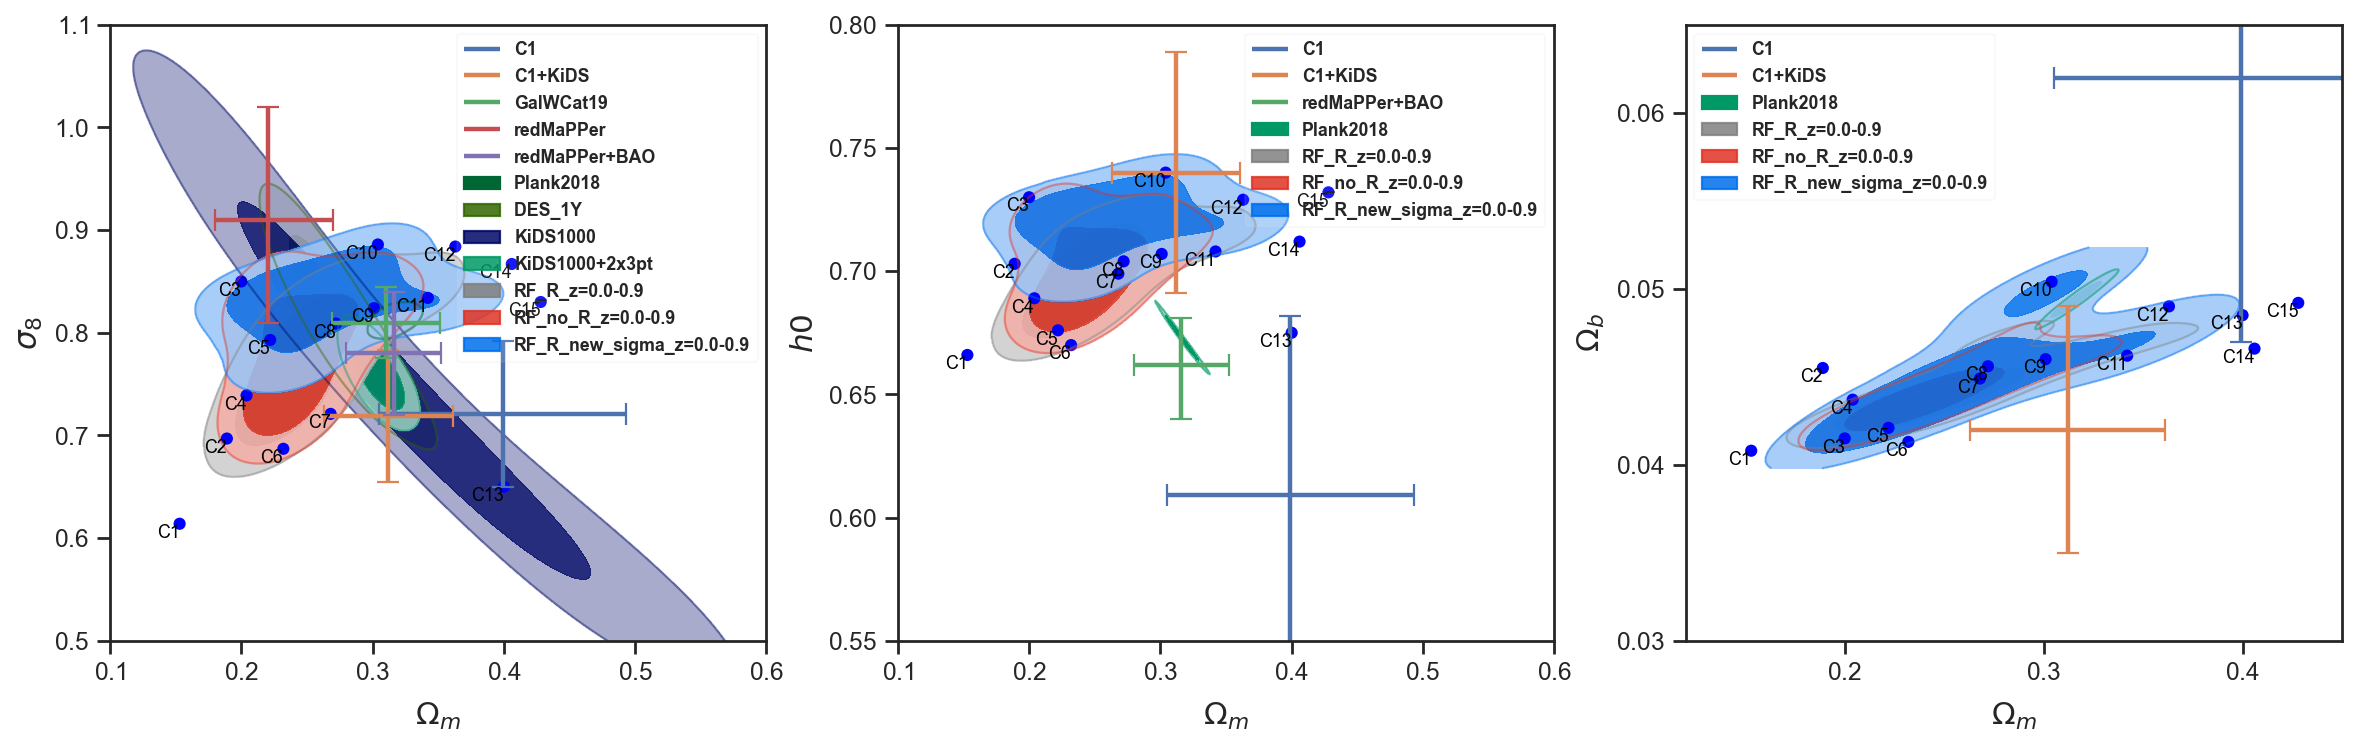

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

<Figure size 600x450 with 0 Axes>

In [4]:
import comparision

catalog_names ={#'RF_z=0.0-0.4':'./results/RandomForest_z=0.0_0.4.csv',
                #'RF_z=0.4-0.6':'./results/RandomForest_z=0.4_0.6.csv',
                #'RF_z=0.6-1.0':'./results/RandomForest_z=0.6_1.0.csv',
                #'RF_z=0.0-0.2':'./results/RandomForest_z=0.0_0.2.csv',
                #'RF_z=0.2-0.4':'./results/RandomForest_z=0.2_0.4.csv',
                'RF_R_z=0.0-0.9':'./results/RF_R_R_z=0.0_0.9.csv',
                'RF_no_R_z=0.0-0.9':'./results/RF_no_R_no_R_z=0.0_0.9.csv',
                #'RF_sigma_z=0.0-0.9':'./results/RF_sigma_sigma_z=0.0_0.9.csv',
                f'RF_{test_name}_z=0.0-0.9':f'./results/RF_{test_name}_{test_name}_z=0.0_0.9.csv',
                }

comparision.RF_smooth = 0.8
comparision.compare(catalog_names)

FileNotFoundError: [Errno 2] No such file or directory: './results/RF_R_R_z=0.2-0.4.csv'

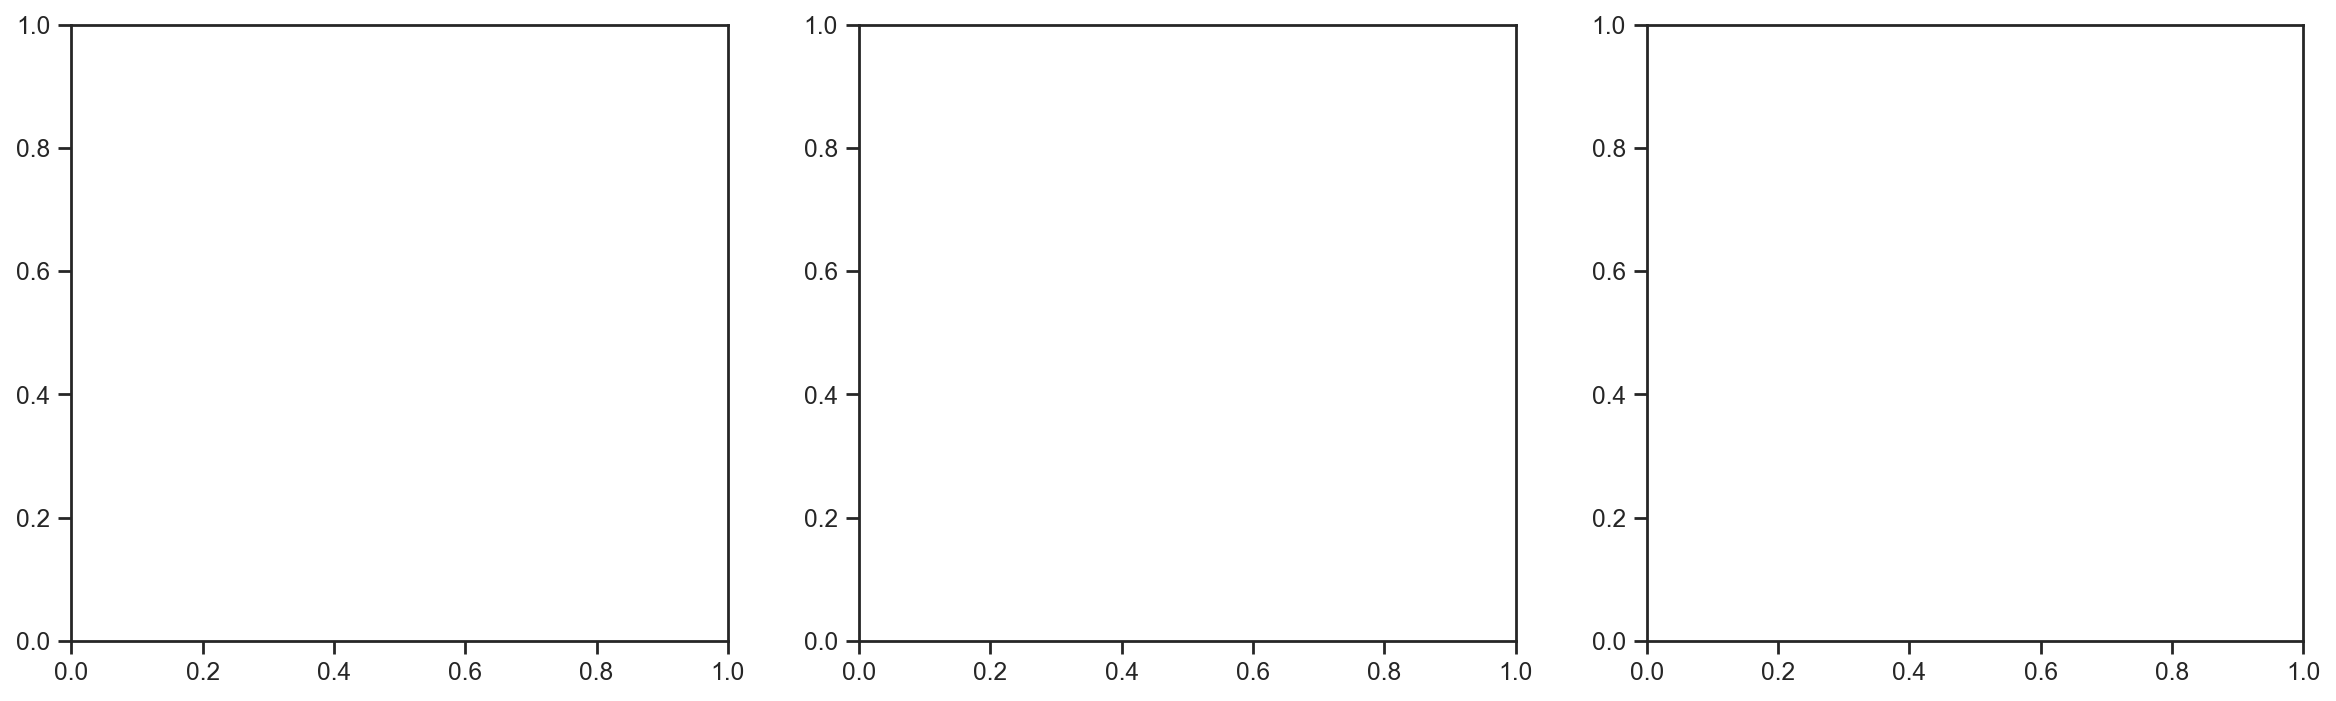

In [7]:
z0, z1 = 0.2, 0.4

catalog_names ={#'RF_z=0.0-0.4':'./results/RandomForest_z=0.0_0.4.csv',
                #'RF_z=0.4-0.6':'./results/RandomForest_z=0.4_0.6.csv',
                #'RF_z=0.6-1.0':'./results/RandomForest_z=0.6_1.0.csv',
                #'RF_z=0.0-0.2':'./results/RandomForest_z=0.0_0.2.csv',
                #'RF_z=0.2-0.4':'./results/RandomForest_z=0.2_0.4.csv',
                f'RF_R_z={z0:.2}-{z1:.2}':f'./results/RF_R_R_z={z0:.2}-{z1:.2}.csv',
                f'RF_no_R_z={z0:.2}-{z1:.2}':f'./results/RF_no_R_no_R_z={z0:.2}-{z1:.2}.csv',
                #'RF_sigma_z=0.0-0.2':'./results/RF_sigma_sigma_z=0.0_0.2.csv',
                f'RF_{test_name}_z={z0:.2}-{z1:.2}':f'./results/RF_{test_name}_{test_name}_z={z0:.2}-{z1:.2}.csv',
                }

comparision.RF_smooth = 0.8
comparision.compare(catalog_names)

In [8]:
redshift_bin = np.linspace(0, 1.0, 6, endpoint=True)
for i in range(len(redshift_bin)-1):
    subset = observed_boost_sample[(observed_boost_sample['z']>=redshift_bin[i]) & (observed_boost_sample['z']<redshift_bin[i+1])]
    subset2 = observed_data[(observed_data['z']>=redshift_bin[i]) & (observed_data['z']<redshift_bin[i+1])]
    print(f"z={redshift_bin[i]:.1f}-{redshift_bin[i+1]:.1f}, num={len(subset2)}, boosted_num={len(subset)}, boost=x100")

z=0.0-0.2, num=1150, boosted_num=98410, boost=x100
z=0.2-0.4, num=1190, boosted_num=103564, boost=x100
z=0.4-0.6, num=552, boosted_num=46358, boost=x100
z=0.6-0.8, num=251, boosted_num=20650, boost=x100
z=0.8-1.0, num=60, boosted_num=4598, boost=x100


2.5 5.660865543509665 1.2 2.4523126861469473 8.5 3.584539045311649


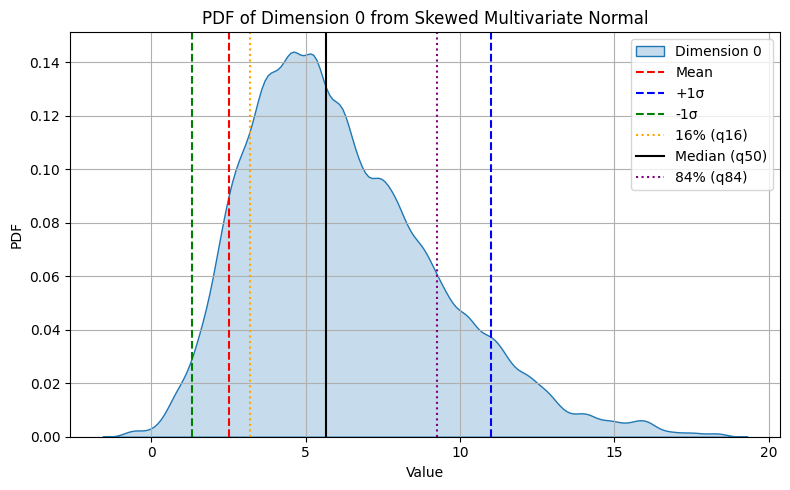

In [7]:
import numpy as np
import seaborn as sns
#使用前面提到的 sample_mvn_skewnorm() 函数（Azzalini方法）采样：

def sample_mvn_skewnorm(mu, Omega, err_plus, err_minus, size=1000, seed=None):
    # Skewness 参数估计
    skewness_ratio = (err_plus-err_minus)/(err_plus + err_minus + 1e-8)
    alpha = 10.0 * skewness_ratio  # 可调节放大因子
    rng = np.random.default_rng(seed)
    d = len(mu)
    z = rng.multivariate_normal(mean=np.zeros(d), cov=Omega, size=size)
    u = rng.normal(size=size)
    delta = alpha / np.sqrt(1 + np.dot(alpha, alpha))
    mask = (u < np.dot(z, delta))
    z[~mask] *= -1
    return mu + z

mean = np.array([15.0, 2.5])
err_plus = np.array([2, 8.5])
err_minus = np.array([1, 1.2])

# 协方差估计
sigma_avg = (err_plus + err_minus)/2
Omega = np.diag(sigma_avg**2)
# 采样
samples = sample_mvn_skewnorm(mean, Omega, err_plus, err_minus, size=5000, seed=42)
dim = 1  # 第几个维度
x = samples[:, dim]
mu = mean[dim]
ep = err_plus[dim]
em = err_minus[dim]
q16, q50, q84 = np.quantile(x, [0.16, 0.5, 0.84])
print(mu, q50, em, q50-q16, ep, q84-q50)
# 🎯 绘制第 0 维 PDF
plt.figure(figsize=(8, 5))
sns.kdeplot(x, bw_adjust=0.5, fill=True, label='Dimension 0')
plt.axvline(mu, color='red', linestyle='--', label='Mean')
plt.axvline(mu + ep, color='blue', linestyle='--', label='+1σ')
plt.axvline(mu - em, color='green', linestyle='--', label='-1σ')
plt.axvline(q16, color='orange', linestyle=':', label='16% (q16)')
plt.axvline(q50, color='black', linestyle='-', label='Median (q50)')
plt.axvline(q84, color='purple', linestyle=':', label='84% (q84)')
plt.xlabel("Value")
plt.ylabel("PDF")
plt.title("PDF of Dimension 0 from Skewed Multivariate Normal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

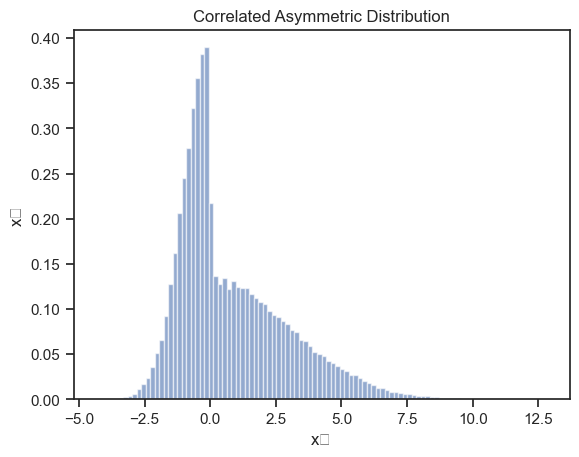

q16: [-0.993892   -0.99408289]
q50: [0.00307737 0.00199179]
q84: [0.99381344 2.98576794]
Δ- : [0.99696937 0.99607468]
Δ+ : [0.99073607 2.98377615]


In [12]:
import torch
import matplotlib.pyplot as plt

def correlated_split_normal_sample(mu, sigma_minus, sigma_plus, cov, n_samples):
    mu = np.asarray(mu)
    sigma_minus = np.asarray(sigma_minus)
    sigma_plus = np.asarray(sigma_plus)
    cov = np.asarray(cov)
    d = mu.shape[0]
    sigma_avg = (sigma_minus+sigma_plus)/2
    sigma = cov*np.outer(sigma_avg, sigma_avg)
    # Cholesky decomposition
    L = np.linalg.cholesky(sigma)  # [d, d]
    # Sample from standard normal
    z = np.random.randn(n_samples, d)  # [N, d]
    # Induce correlation: z_corr ~ N(0, cov)
    z_corr = z @ L.T  # [N, d]
    # Apply asymmetric scaling (split-normal transform)
    mu = mu[None, :]                # [1, d]
    sigma_minus = sigma_minus[None, :]  # [1, d]
    sigma_plus = sigma_plus[None, :]    # [1, d]
    # Sharp threshold at z_corr = 0
    sigma = np.where(z_corr<0, sigma_minus/sigma_avg, sigma_plus/sigma_avg)
    x = mu + z_corr * sigma
    return x


mu = torch.tensor([0.0, 0.0])
sigma_minus = torch.tensor([1.0, 1.0])
sigma_plus = torch.tensor([1.0, 3.0])

# 设置协方差矩阵（非对角）
cov = torch.tensor([[1.0, 0.3],[0.3, 1.0]])
samples = correlated_split_normal_sample(mu, sigma_minus, sigma_plus, cov, 100_000)
dim = 1
#plt.hist2d(samples[:, 0], samples[:, 1], bins=200, density=True)
plt.hist(samples[:, dim], bins=100, density=True, alpha=0.6)
plt.title("Correlated Asymmetric Distribution")
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.show()

# 统计每一维的中位数和误差
q16 = np.quantile(samples, 0.16, axis=0)
q50 = np.quantile(samples, 0.50, axis=0)
q84 = np.quantile(samples, 0.84, axis=0)
print("q16:", q16)
print("q50:", q50)
print("q84:", q84)
print("Δ- :", q50 - q16)
print("Δ+ :", q84 - q50)

/var/folders/sd/8xsdwm8n70q6psc1047lgnb40000gn/T/ipykernel_57424/1410750842.py:35: RuntimeWarning: invalid value encountered in log10
  plt.scatter(eROSTA_DR1['z'], np.log10(eROSTA_DR1['Lbol500'])+42, color='red', s=5, marker='o')


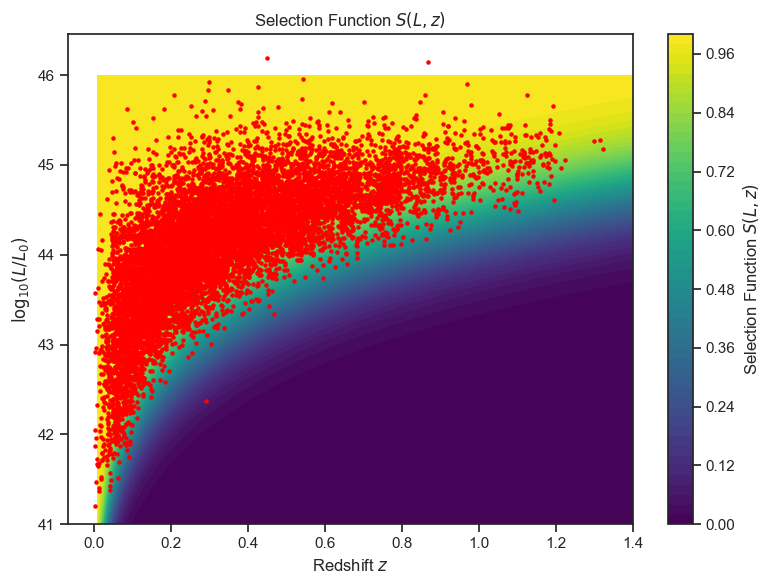

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from astropy.cosmology import Planck18 as cosmo


# 设置极限光度 [erg/s]
L_lim_fixed = 1e38
sigma_logL = 0.5  # 对数光度误差

D0 = cosmo.luminosity_distance(z=0.001).to('cm').value
flux_limit = L_lim_fixed/(4*np.pi*D0**2)

# 每个 z 下的极限光度（用于与目标 L 比较）
def L_lim_z(z):
    D_L = cosmo.luminosity_distance(z).to('cm').value  # 输出单位：cm
    L_lim = 4 * np.pi * D_L**2 * flux_limit
    return L_lim

# 新选择函数：直接对比 log10 L 和 log10 L_lim(z)
def selection_function(L, z):
    logL = np.log10(L)
    logL_lim = np.log10(L_lim_z(z))
    return 0.5*(1 - erf((logL_lim - logL)/(np.sqrt(2) * sigma_logL)))

L_vals = np.logspace(41, 46, 100)  # 光度范围
z_vals = np.linspace(0.01, 1.4, 100)
# 构建二维网格
L_grid, z_grid = np.meshgrid(L_vals, z_vals)
S_grid = selection_function(L_grid, z_grid)
plt.figure(figsize=(8, 6))
contour = plt.contourf(z_grid, np.log10(L_grid), S_grid, levels=50, cmap='viridis')
cbar = plt.colorbar(contour)
cbar.set_label('Selection Function $S(L, z)$')
plt.scatter(eROSTA_DR1['z'], np.log10(eROSTA_DR1['Lbol500'])+42, color='red', s=5, marker='o')
plt.ylabel(r'$\log_{10}(L/L_0)$')
plt.xlabel('Redshift $z$')
plt.title('Selection Function $S(L, z)$')
plt.tight_layout()
plt.show()

In [59]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u

results = []
keys = ['name1', 'name2', 'ra_h', 'ra_m', 'ra_s', 'dec_d', 'dec_m', 'dec_s', 'cz', 'Dispersione', 'Velocita Della BCG', 'Differenza v(bcg)-redshift/sigma']
with open('./Data/new_vdis_catalog/galcen.txt', 'r', encoding='utf-8') as f:
    for line in f:
        #print(line.strip())
        values = line.strip().split()
        data_dict = dict(zip(keys, values))
        results.append(data_dict)

results = Table(results)

results['ra_s'] = [float(str(s).strip().rstrip('.')) for s in results['ra_s']]
results['dec_s'] = [float(str(s).strip().rstrip('.')) for s in results['dec_s']]

#results['ra'] = 15 * (results['ra_h'].data.astype(float) + results['ra_m'].data.astype(float)/60 + results['ra_s'].data.astype(float)/3600)
#results['dec'] = results['dec_d'].data.astype(float) +  results['dec_m'].data.astype(float)/60 + results['dec_s'].data.astype(float)/3600

ra_h, ra_m, ra_s = results['ra_h'].data.astype(float), results['ra_m'].data.astype(float), results['ra_s'].data.astype(float)
dec_d, dec_m, dec_s = results['dec_d'].data.astype(float), results['dec_m'].data.astype(float), results['dec_s'].data.astype(float)


coord = SkyCoord(ra=ra_h*u.hour + ra_m*u.minute + ra_s*u.second,
                 dec=dec_d*u.deg + dec_m*u.arcmin + dec_s*u.arcsec)

results['ra'] = coord.ra.deg
results['dec'] = coord.dec.deg
results['name'] = results['name1'] + results['name2']
results['Dispersione'] = results['Dispersione'].data.astype(float)

results.write(f'./Data/new_vdis_catalog/new_dispersion_catalog.fits', format="fits", overwrite=True)

In [73]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

# new Catalog1
new_catalog = Table.read('./Data/new_vdis_catalog/new_dispersion_catalog.fits')
ra1 = new_catalog['ra'].data  # degrees
dec1 = new_catalog['dec'].data

# Catalog2
Optical_properties = Table.read('./Data/J_A+A_688_A210/J_A+A_688_A210_tablee1.dat.gz.fits')
ra2 = Optical_properties['RAdeg'].data
dec2 = Optical_properties['DEdeg'].data

# 转换成 SkyCoord 对象
cat1 = SkyCoord(ra=ra1*u.deg, dec=dec1*u.deg)
cat2 = SkyCoord(ra=ra2*u.deg, dec=dec2*u.deg)

# 最近邻匹配
idx, d2d, d3d = cat1.match_to_catalog_sky(cat2)

# 限制匹配距离
sep_constraint = d2d < 1 * u.arcmin
matches = np.where(sep_constraint)[0]

for i in matches:
    print(f"Cat1[{i}] matched to Cat2[{idx[i]}] within 1 arcmin")


matched_cat1 = new_catalog[matches]          # cat1 中匹配成功的条目
matched_cat2 = Optical_properties[idx[matches]]     # cat2 中对应匹配到的条目

Cat1[21] matched to Cat2[6712] within 1 arcmin
Cat1[22] matched to Cat2[6980] within 1 arcmin
Cat1[26] matched to Cat2[7213] within 1 arcmin
Cat1[27] matched to Cat2[7366] within 1 arcmin
Cat1[32] matched to Cat2[7904] within 1 arcmin
Cat1[33] matched to Cat2[7910] within 1 arcmin
Cat1[37] matched to Cat2[8249] within 1 arcmin
Cat1[42] matched to Cat2[8403] within 1 arcmin
Cat1[43] matched to Cat2[8407] within 1 arcmin
Cat1[44] matched to Cat2[8485] within 1 arcmin
Cat1[45] matched to Cat2[8489] within 1 arcmin
Cat1[47] matched to Cat2[8596] within 1 arcmin
Cat1[48] matched to Cat2[8871] within 1 arcmin
Cat1[49] matched to Cat2[8947] within 1 arcmin
Cat1[60] matched to Cat2[9703] within 1 arcmin
Cat1[67] matched to Cat2[10153] within 1 arcmin
Cat1[74] matched to Cat2[10579] within 1 arcmin
Cat1[194] matched to Cat2[9149] within 1 arcmin


Text(0, 0.5, 'new catalog Visp')

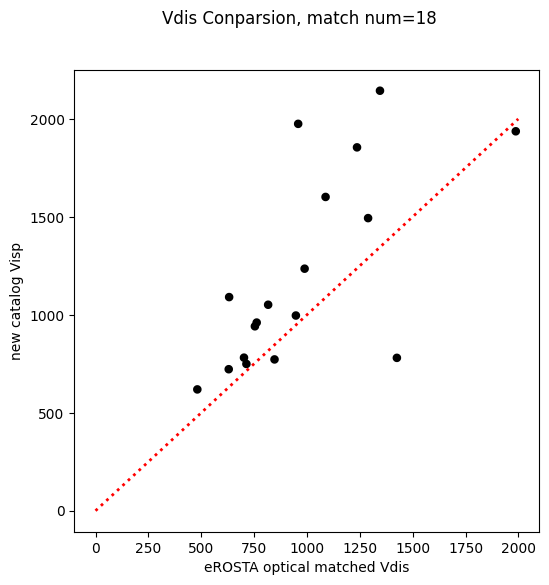

In [80]:
import matplotlib.pyplot as plt

vdis1 = matched_cat1['Dispersione'].data
vdis2 = matched_cat2['vdispBoot'].data

plt.figure(figsize = (6,6))
plt.suptitle(f'Vdis Conparsion, match num={len(vdis1)}')
plt.scatter(vdis2, vdis1, edgecolors = 'k', marker = 'o', s = 10, lw = 3.0, facecolors = 'none')
plt.plot(np.arange(2000), np.arange(2000), ls = ':', color = 'r', lw = 2.0)
plt.xlabel('eROSTA optical matched Vdis')
plt.ylabel('new catalog Visp')


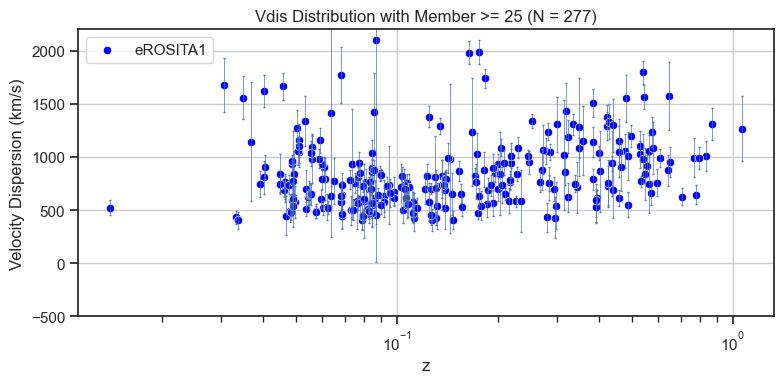

In [18]:
import seaborn as sns
from astropy.table import Table
import matplotlib.pyplot as plt

Optical_properties = Table.read('./Data/J_A+A_688_A210/J_A+A_688_A210_tablee1.dat.gz.fits')
#Optical_properties = Optical_properties[Optical_properties['vdispBoot']>0]
Vdis = Optical_properties['vdispBoot'].data
Vdis_err = Optical_properties['e_vdispBoot'].data
redshift = Optical_properties['Bestz'].data
#mask = (Optical_properties['Nmemb']>=3) & (Optical_properties['Nmemb']<=5)
mask = (Optical_properties['Nmemb']>=20) & (Optical_properties['vdispBoot']>=400) & (Optical_properties['Nmemb']<=1250)
plt.figure(figsize=(8, 4))

plt.errorbar(redshift[mask], Vdis[mask], yerr=Vdis_err[mask], fmt='none', elinewidth=0.5, capsize=1)
sns.scatterplot(x=redshift[mask], y=Vdis[mask], color='blue', label='eROSITA1')
plt.ylim(-500, 2200)
plt.xscale('log')
plt.title(f'Vdis Distribution with Member >= 25 (N = {len(Vdis[mask])})')
plt.ylabel('Velocity Dispersion (km/s)')
plt.xlabel('z')
plt.grid(True)
plt.tight_layout()
plt.show()

(0.0, 2200.0)

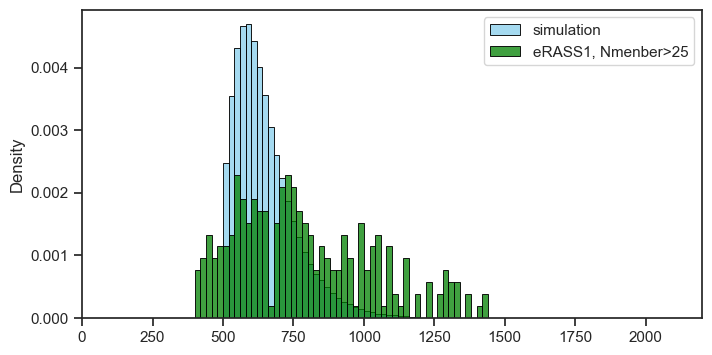

In [20]:
import numpy as np
plt.figure(figsize=(8, 4))

sim_vdis = simulated_data['VDIS'].data
obs_vdis = Vdis[mask]
sns.histplot(sim_vdis, bins=np.arange(200, 1500, 20), kde=False, color='skyblue', edgecolor='black', stat='density', label='simulation')
sns.histplot(obs_vdis, bins=np.arange(200, 1500, 20), kde=False, color='green', edgecolor='black', stat='density', label='eRASS1, Nmenber>25')
plt.legend()
plt.xlim(0, 2200)

In [17]:
simulated_data.keys()

['id',
 'R',
 'R_E',
 'R_e',
 'Mgas',
 'Mgas_E',
 'Mgas_e',
 'L',
 'L_E',
 'L_e',
 'T',
 'T_E',
 'T_e',
 'z',
 'Msta',
 'Msta_E',
 'Msta_e',
 'M_TOL',
 'M_TOL_E',
 'M_TOL_e',
 'M_RVIR',
 'VDIS',
 'label',
 'Omega',
 'OmegaB',
 'Sigm8',
 'Hubble',
 'z_E',
 'z_e']

In [5]:
Optical_properties.keys()

['Name',
 'DetUId',
 'RAdeg',
 'DEdeg',
 'ePos',
 'RAOdeg',
 'DEOdeg',
 'RABdeg',
 'DEBdeg',
 'zmagBCG',
 'Bestz',
 'e_Bestz',
 'Bestztype',
 'zlambda',
 'e_zlambda',
 'zlambdacorr',
 'E_zlambdacorr',
 'e_zlambdacorr',
 'zlambda2',
 'Litz',
 'e_Litz',
 'r_Litz',
 'SpeczBoot',
 'e_SpeczBoot',
 'Nmemb',
 'CGSpecz',
 'e_CGSpecz',
 'BCGSpecz',
 'vdispBoot',
 'e_vdispBoot',
 'f_vdispBoot',
 'vdispType',
 'LambdaN',
 'e_LambdaN',
 'LambdaOptN',
 'e_LambdaOptN',
 'ScaleVal',
 'MaskFrac',
 'Run',
 'Lmax',
 'NHI',
 'ExtLike',
 'Pcont',
 'SharedMemb',
 'InfootPrint',
 'limgmag',
 'limrmag',
 'limimag',
 'limzmag',
 'limW1mag',
 'inzvlim',
 'zvlim02',
 'zvlim04',
 'Gaia',
 'NGC30',
 'HECATE']

In [8]:
sum(Optical_properties['Nmemb'] >= 3)

np.int64(1906)

In [ ]:
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

# new Catalog1
new_catalog = Table.read('./Data/new_vdis_catalog/new_dispersion_catalog.fits')
ra1 = new_catalog['ra'].data  # degrees
dec1 = new_catalog['dec'].data

# Catalog2
Optical_properties = Table.read('./Data/J_A+A_688_A210/J_A+A_688_A210_tablee1.dat.gz.fits')
ra2 = Optical_properties['RAdeg'].data
dec2 = Optical_properties['DEdeg'].data

# 转换成 SkyCoord 对象
cat1 = SkyCoord(ra=ra1*u.deg, dec=dec1*u.deg)
cat2 = SkyCoord(ra=ra2*u.deg, dec=dec2*u.deg)

# 最近邻匹配
idx, d2d, d3d = cat1.match_to_catalog_sky(cat2)

# 限制匹配距离
sep_constraint = d2d < 1 * u.arcmin
matches = np.where(sep_constraint)[0]

for i in matches:
    print(f"Cat1[{i}] matched to Cat2[{idx[i]}] within 1 arcmin")


matched_cat1 = new_catalog[matches]          # cat1 中匹配成功的条目
matched_cat2 = Optical_properties[idx[matches]]     # cat2 中对应匹配到的条目

Cat1[21] matched to Cat2[6712] within 1 arcmin
Cat1[22] matched to Cat2[6980] within 1 arcmin
Cat1[26] matched to Cat2[7213] within 1 arcmin
Cat1[27] matched to Cat2[7366] within 1 arcmin
Cat1[32] matched to Cat2[7904] within 1 arcmin
Cat1[33] matched to Cat2[7910] within 1 arcmin
Cat1[37] matched to Cat2[8249] within 1 arcmin
Cat1[42] matched to Cat2[8403] within 1 arcmin
Cat1[43] matched to Cat2[8407] within 1 arcmin
Cat1[44] matched to Cat2[8485] within 1 arcmin
Cat1[45] matched to Cat2[8489] within 1 arcmin
Cat1[47] matched to Cat2[8596] within 1 arcmin
Cat1[48] matched to Cat2[8871] within 1 arcmin
Cat1[49] matched to Cat2[8947] within 1 arcmin
Cat1[60] matched to Cat2[9703] within 1 arcmin
Cat1[67] matched to Cat2[10153] within 1 arcmin
Cat1[74] matched to Cat2[10579] within 1 arcmin
Cat1[194] matched to Cat2[9149] within 1 arcmin


In [7]:
from astropy.table import Table
Optical_properties = Table.read('./Data/J_A+A_688_A210/J_A+A_688_A210_tablee1.dat.gz.fits')
Optical_properties

Name,DetUId,RAdeg,DEdeg,ePos,RAOdeg,DEOdeg,RABdeg,DEBdeg,zmagBCG,Bestz,e_Bestz,Bestztype,zlambda,e_zlambda,zlambdacorr,E_zlambdacorr,e_zlambdacorr,zlambda2,Litz,e_Litz,r_Litz,SpeczBoot,e_SpeczBoot,Nmemb,CGSpecz,e_CGSpecz,BCGSpecz,vdispBoot,e_vdispBoot,f_vdispBoot,vdispType,LambdaN,e_LambdaN,LambdaOptN,e_LambdaOptN,ScaleVal,MaskFrac,Run,Lmax,NHI,ExtLike,Pcont,SharedMemb,InfootPrint,limgmag,limrmag,limimag,limzmag,limW1mag,inzvlim,zvlim02,zvlim04,Gaia,NGC30,HECATE
,,deg,deg,arcsec,deg,deg,deg,deg,mag,,,,,,,,,,,,,,,,,,,km / s,km / s,,,,,,,,,,,1e+21 / cm2,,,,,mag,mag,mag,mag,mag,,,,,,
bytes23,bytes32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes11,float64,float64,float64,float64,float64,float64,float64,float64,bytes18,float64,float64,int16,float64,float64,float64,float64,float64,float64,bytes8,float64,float64,float64,float64,float64,float64,bytes29,float64,float64,float64,float64,int16,int16,float64,float64,float64,float64,float64,int16,float64,float64,int16,int16,int16
1eRASS J000005.2-383729,em01_002129_020_ML00014_002_c010,0.0217,-38.62490,6.33,0.0238,-38.62678,0.0238,-38.62678,16.677,0.31528,0.00794,photo_z,0.31528,0.00794,0.31742,0.00672,0.00712,0.00000,0.30060,0.00665,ACTDR5,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00,0.00,0.00,--,40.02,5.86,39.80,5.82,1.39474,0.282,legacy_dr10_grz_z_v0.9,64.5561,0.01061,9.63451,0.0056,0,1,25.02,23.65,23.86,22.37,20.73,1,0.721,0.970,0,0,0
1eRASS J000021.4-824954,em01_011174_020_ML00047_002_c010,0.0892,-82.83172,18.70,0.1768,-82.79820,0.1768,-82.79820,13.944,0.08909,0.00015,cg_spec_z,0.08594,0.00976,0.08424,0.00770,0.00780,0.00000,0.00000,0.00000,--,0.00000,0.00000,0,0.08909,0.00015,0.08909,0.00,0.00,0.00,--,20.16,7.09,23.22,7.48,1.79105,0.441,legacy_dr10_grz_z_v0.9,15.8469,0.07978,14.92813,0.0000,0,1,22.90,23.13,22.79,20.88,21.05,1,0.400,0.546,0,0,0
1eRASS J000031.0-500903,em01_002141_020_ML00031_002_c010,0.1294,-50.15101,6.66,0.1363,-50.14802,0.1295,-50.15415,13.407,0.06809,0.00015,cg_spec_z,0.09378,0.00962,0.09328,0.00723,0.00717,0.00000,0.00000,0.00000,--,0.00000,0.00000,0,0.06809,0.00015,0.02869,0.00,0.00,0.00,--,8.76,2.34,8.76,2.36,1.19031,0.156,legacy_dr10_grz_z_v0.9,14.2028,0.01144,6.97522,0.2180,0,1,24.11,24.07,23.18,21.92,20.78,1,0.613,0.816,0,0,0
1eRASS J000031.8-630131,em01_003153_020_ML00092_010_c010,0.1327,-63.02528,17.26,0.1254,-63.02307,0.1254,-63.02307,16.001,0.24480,0.00580,photo_z,0.24480,0.00580,0.24482,0.00639,0.00535,0.00000,0.00000,0.00000,--,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00,0.00,0.00,--,31.96,2.80,31.51,2.79,1.05713,0.055,legacy_dr10_grz_z_v0.9,53.5715,0.02241,12.91415,0.0047,0,1,24.15,23.95,23.40,22.89,20.91,1,0.890,1.141,0,0,0
1eRASS J000045.3-462341,em01_002135_020_ML00092_002_c010,0.1891,-46.39488,8.02,0.1862,-46.39548,0.1862,-46.39548,13.998,0.09254,0.00040,cg_spec_z,0.11026,0.00904,0.11083,0.00566,0.00568,0.00000,0.00000,0.00000,--,0.00000,0.00000,0,0.09254,0.00040,0.09254,0.00,0.00,0.00,--,4.93,1.67,4.90,1.67,1.16717,0.139,legacy_dr10_grz_z_v0.9,8.7834,0.01805,4.16331,0.7151,0,1,24.23,23.84,23.08,22.67,20.65,1,0.814,1.069,0,0,0
1eRASS J000056.7-682010,em01_004159_020_ML00094_010_c010,0.2365,-68.33622,13.62,0.2301,-68.33678,0.1765,-68.37287,16.260,0.24147,0.00730,photo_z,0.24147,0.00730,0.24130,0.00598,0.00495,0.00000,0.00000,0.00000,--,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00,0.00,0.00,--,10.87,2.32,11.09,2.31,1.15975,0.142,legacy_dr10_grz_z_v0.9,15.1479,0.02239,7.90924,0.0712,0,1,24.23,24.00,23.12,22.44,20.94,1,0.741,0.996,0,0,0
1eRASS J000104.0-464435,em01_002138_020_ML00009_002_c010,0.2670,-46.74311,49.15,0.2840,-46.73466,0.2840,-46.73466,15.766,0.17199,0.00420,photo_z,0.17199,0.00420,0.17202,0.00505,0.00444,0.00000,0.00000,0.00000,--,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00,0.00,0.00,--,38.31,2.76,37.93,2.67,1.05454,0.054,legacy_dr10_grz_z_v0.9,80.5055,0.01342,30.14310,0.0005,0,1,24.34,24.18,23.37,22.89,20.84,1,0.889,1.140,0,0,0
1eRASS J000104.1-431959,em01_002132_020_ML00183_002_c010,0.267